## **House Price - Advance Regressions Techniques**

### **Predicting House Prices with Machine Learning**

#### **Introduction**
This project tackles the challenge of predicting house prices by analyzing various features that influence property values. The objective is to create a model that accurately predicts house prices, benefiting both buyers and sellers.

#### **Project Workflow**

1. **Understanding the Client and Their Problem**
   - **House Buyer**: Seeks a fair price for their dream home, interested in how features like bathrooms and location impact the price.
   - **House Seller**: Aims to maximize house value by investing in features that offer the highest return, like expanding living space.

2. **Loading Data and Packages**
   - Import necessary libraries and datasets.
   - Perform initial checks to understand the data structure.

3. **Analyzing the Target Variable (Sale Price)**
   - Explore the distribution and characteristics of the sale price.
   - Use statistical measures to assess normality.

4. **Multivariable Analysis**
   - **Categorical vs. Numerical Features**: Identify and categorize features.
   - **Correlation Analysis**: Use a correlation matrix and heatmaps to find key features related to the sale price.

5. **Feature Engineering**
   - Clean and analyze top features like Overall Quality and Living Area.
   - Remove outliers and transform data as needed.

6. **Impute Missing Data and Clean Data**
   - Identify and logically impute missing values based on observed patterns.

7. **Feature Transformation and Engineering**
   - Scale numerical features, encode categorical variables, and create new features.

8. **Modeling and Predictions**
   - Experiment with machine learning models like Linear Regression, Random Forest, and XGBoost.
   - Fine-tune and evaluate models, selecting the best performer.

**Conclusion**
   - Summarize findings and model effectiveness.
   - Highlight how the model can assist both buyers and sellers in making informed decisions.

### **Step:-1. Loading Data and Packages**
- ##### **Pandas** is used for data manipulation and analysis.
- ##### **Numpy** is used for numerical operations on arrays and matrices.
- ##### **Seaborn** is used for statistical data visualization.
- ##### **Matplotlib** is used for creating static, animated, and interactive visualizations.
- ##### **XGBoost** is an optimized gradient boosting library designed for speed and performance.
- ##### **LightGBM** is a gradient boosting framework that uses tree-based learning algorithms.
- ##### **Imports the skew and norm functions from the scipy.stats module,** which are used for statistical analysis.
- ##### **Imports the stats module from scipy,** which contains a large number of probability distributions and statistical functions.
- ##### **LassoCV:** Performs Lasso regression with cross-validation to select the best regularization parameter.
- ##### **Ridge:** Performs Ridge regression to prevent overfitting by adding a penalty to the loss function.
- ##### **ElasticNetCV:** Combines Lasso and Ridge regression with cross-validation to select the best parameters.from sklearn.linear_model import LassoCV, Ridge, ElasticNetCV
- ##### **GridSearchCV:** Searches over specified parameter values for an estimator using cross-validation.
- ##### **cross_val_score:** Evaluates a model’s performance using cross-validation.from sklearn.model_selection import GridSearchCV, cross_val_score
- ##### **RandomForestRegressor:** Fits multiple decision trees on sub-samples and averages results to improve accuracy.
- ##### **GradientBoostingRegressor:** Builds an additive model to optimize for a differentiable loss function.
- ##### **StandardScaler** which is used to standardize features by removing the mean and scaling to unit variance.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, norm
from scipy import stats
from sklearn.linear_model import LassoCV, Ridge, ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Imports the warnings library, which is used to handle warnings in the code.
import warnings
# Ignoring warnings for cleaner output
warnings.filterwarnings('ignore')

# Setting the style for plots
sns.set(style='white', context='notebook', palette='deep')

# Display plots in high resolution
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [104]:
# Loading the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [105]:
# Display the five rows of the train dataset
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [106]:
# print the all columns names of the train dataset
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [107]:
# Display the five rows of the test dataset
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [108]:
# print the all columns names of the test dataset
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
# Displaying the shape of the datasets before dropping the 'Id' column
print(f"The train data size before dropping Id feature is: {train_data.shape}")
print(f"The test data size before dropping Id feature is: {test_data.shape}")

The train data size before dropping Id feature is: (1460, 81)
The test data size before dropping Id feature is: (1459, 80)


In [110]:
# Saving the 'Id' column for later use
train_ID = train_data['Id']
test_ID = test_data['Id']

# Dropping the 'Id' column as it is not needed for predictions
train_data.drop(columns = "Id", inplace = True)  # train_data.drop("Id",axis = 1, inplace=True)  
test_data.drop(columns = "Id", inplace=True)   # test_data.drop("Id",axis = 1, inplace=True)

In [111]:
# Displaying the shape of the datasets after dropping the 'Id' column
print(f"\nThe train data size after dropping Id feature is: {train_data.shape}") 
print(f"The test data size after dropping Id feature is: {test_data.shape}")


The train data size after dropping Id feature is: (1460, 80)
The test data size after dropping Id feature is: (1459, 79)


### **Step:-2. Analyzing the Target Variable (Sale Price)**
- **Let's examine the 'SalePrice' to understand its distribution and key statistics.**


In [112]:
# Displaying the summary statistics of 'SalePrice'
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

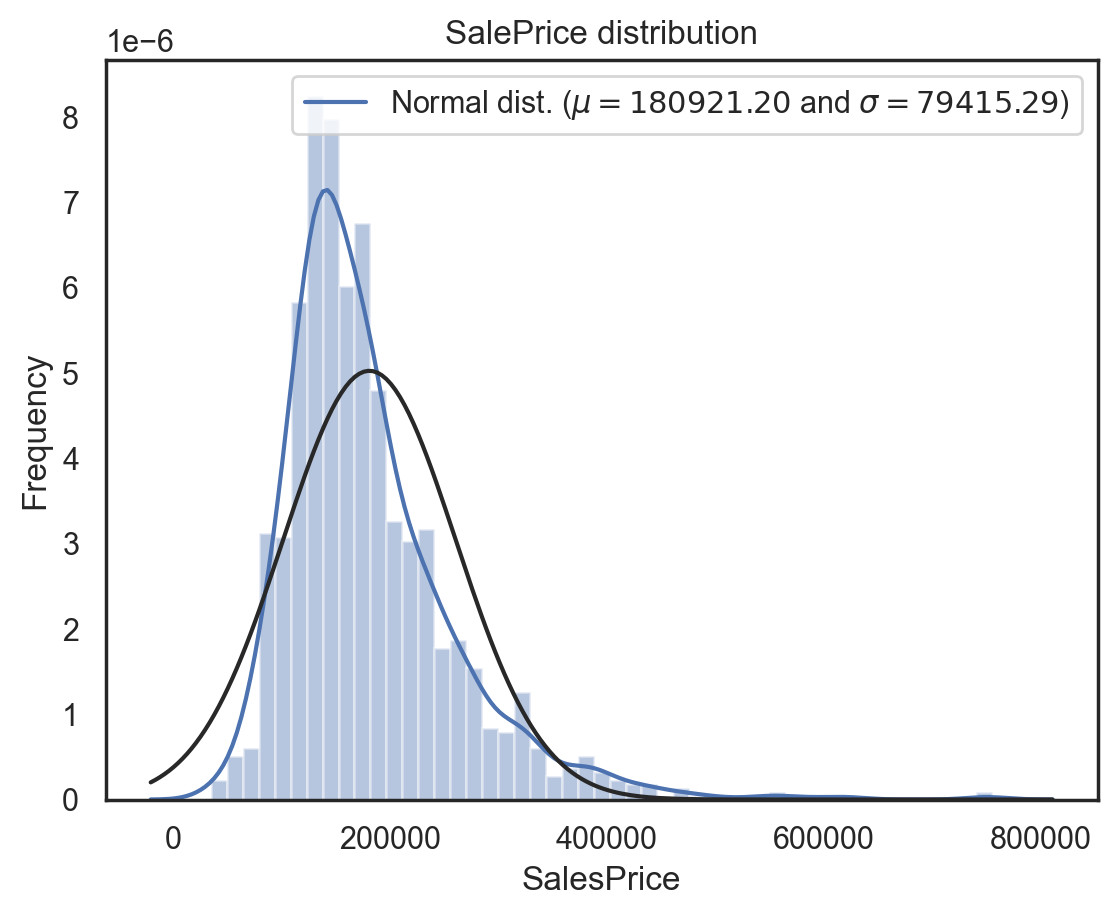

In [113]:
# Plotting the distribution of 'SalePrice'
sns.distplot(train_data['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_data['SalePrice'])
plt.legend([f'Normal dist. ($\mu={mu:.2f}$ and $\sigma={sigma:.2f}$)'], loc='best')
plt.ylabel("Frequency")
plt.xlabel("SalesPrice")
plt.title('SalePrice distribution')
plt.show()


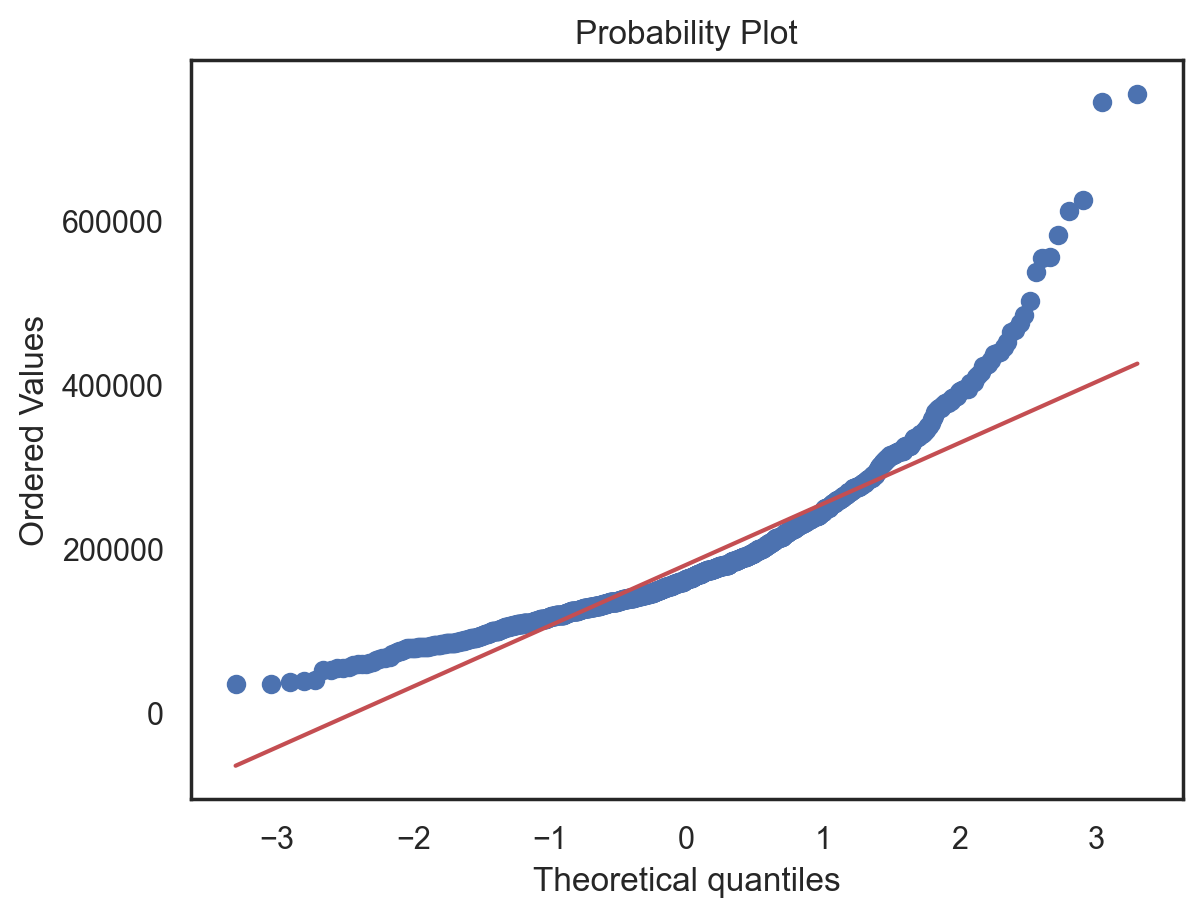

In [114]:
# Plotting the probability plot of 'SalePrice'
stats.probplot(train_data['SalePrice'], plot = plt)
plt.show()

In [115]:
# Displaying the skewness and kurtosis
print(f"Skewness: {train_data['SalePrice'].skew()}")
print(f"Kurtosis: {train_data['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


========> The distribution looks normal at first, but it’s not! The high kurtosis score shows a sharp peak, while the skewness score indicates that the sale prices are not evenly spread around the mean. We’ll need to adjust this to make our data more normal.

### **Step:-3. Multivariable Analysis**

- **Let's explore the relationship between 'SalePrice' and other features using correlation and plots.**
- **And check out all the variables! There are two types of features in housing data, categorical and numerical.**

In [116]:
# Displaying the list of categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object'])
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])

print(categorical_features.columns)
print(numerical_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

In [117]:
print(f'Total Features: {len(categorical_features.columns)} categorical + {len(numerical_features.columns)} numerical = {len(train_data.columns)} features')

Total Features: 43 categorical + 37 numerical = 80 features


**=======> With 81 features, it can be challenging to identify which ones are most related to house prices.** 

**A correlation matrix is a great tool for this. It helps us see the relationships between all the features and the target variable, "SalePrice", at a glance.**

##### **Let’s calculate the correlation matrix and visualize the top features most correlated with "SalePrice":**
  - A correlation matrix is a table that shows the correlation coefficients between multiple variables. 
  - Each cell in the matrix represents the correlation between two variables.
  - A correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables. 
  - A heatmap is a data visualization tool that uses color to represent the magnitude of values in a matrix. It helps to quickly identify patterns, correlations, and outliers in complex data sets. 

In [118]:
# find the correlation matrix
corrmat = numerical_features.corr()
print(corrmat)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

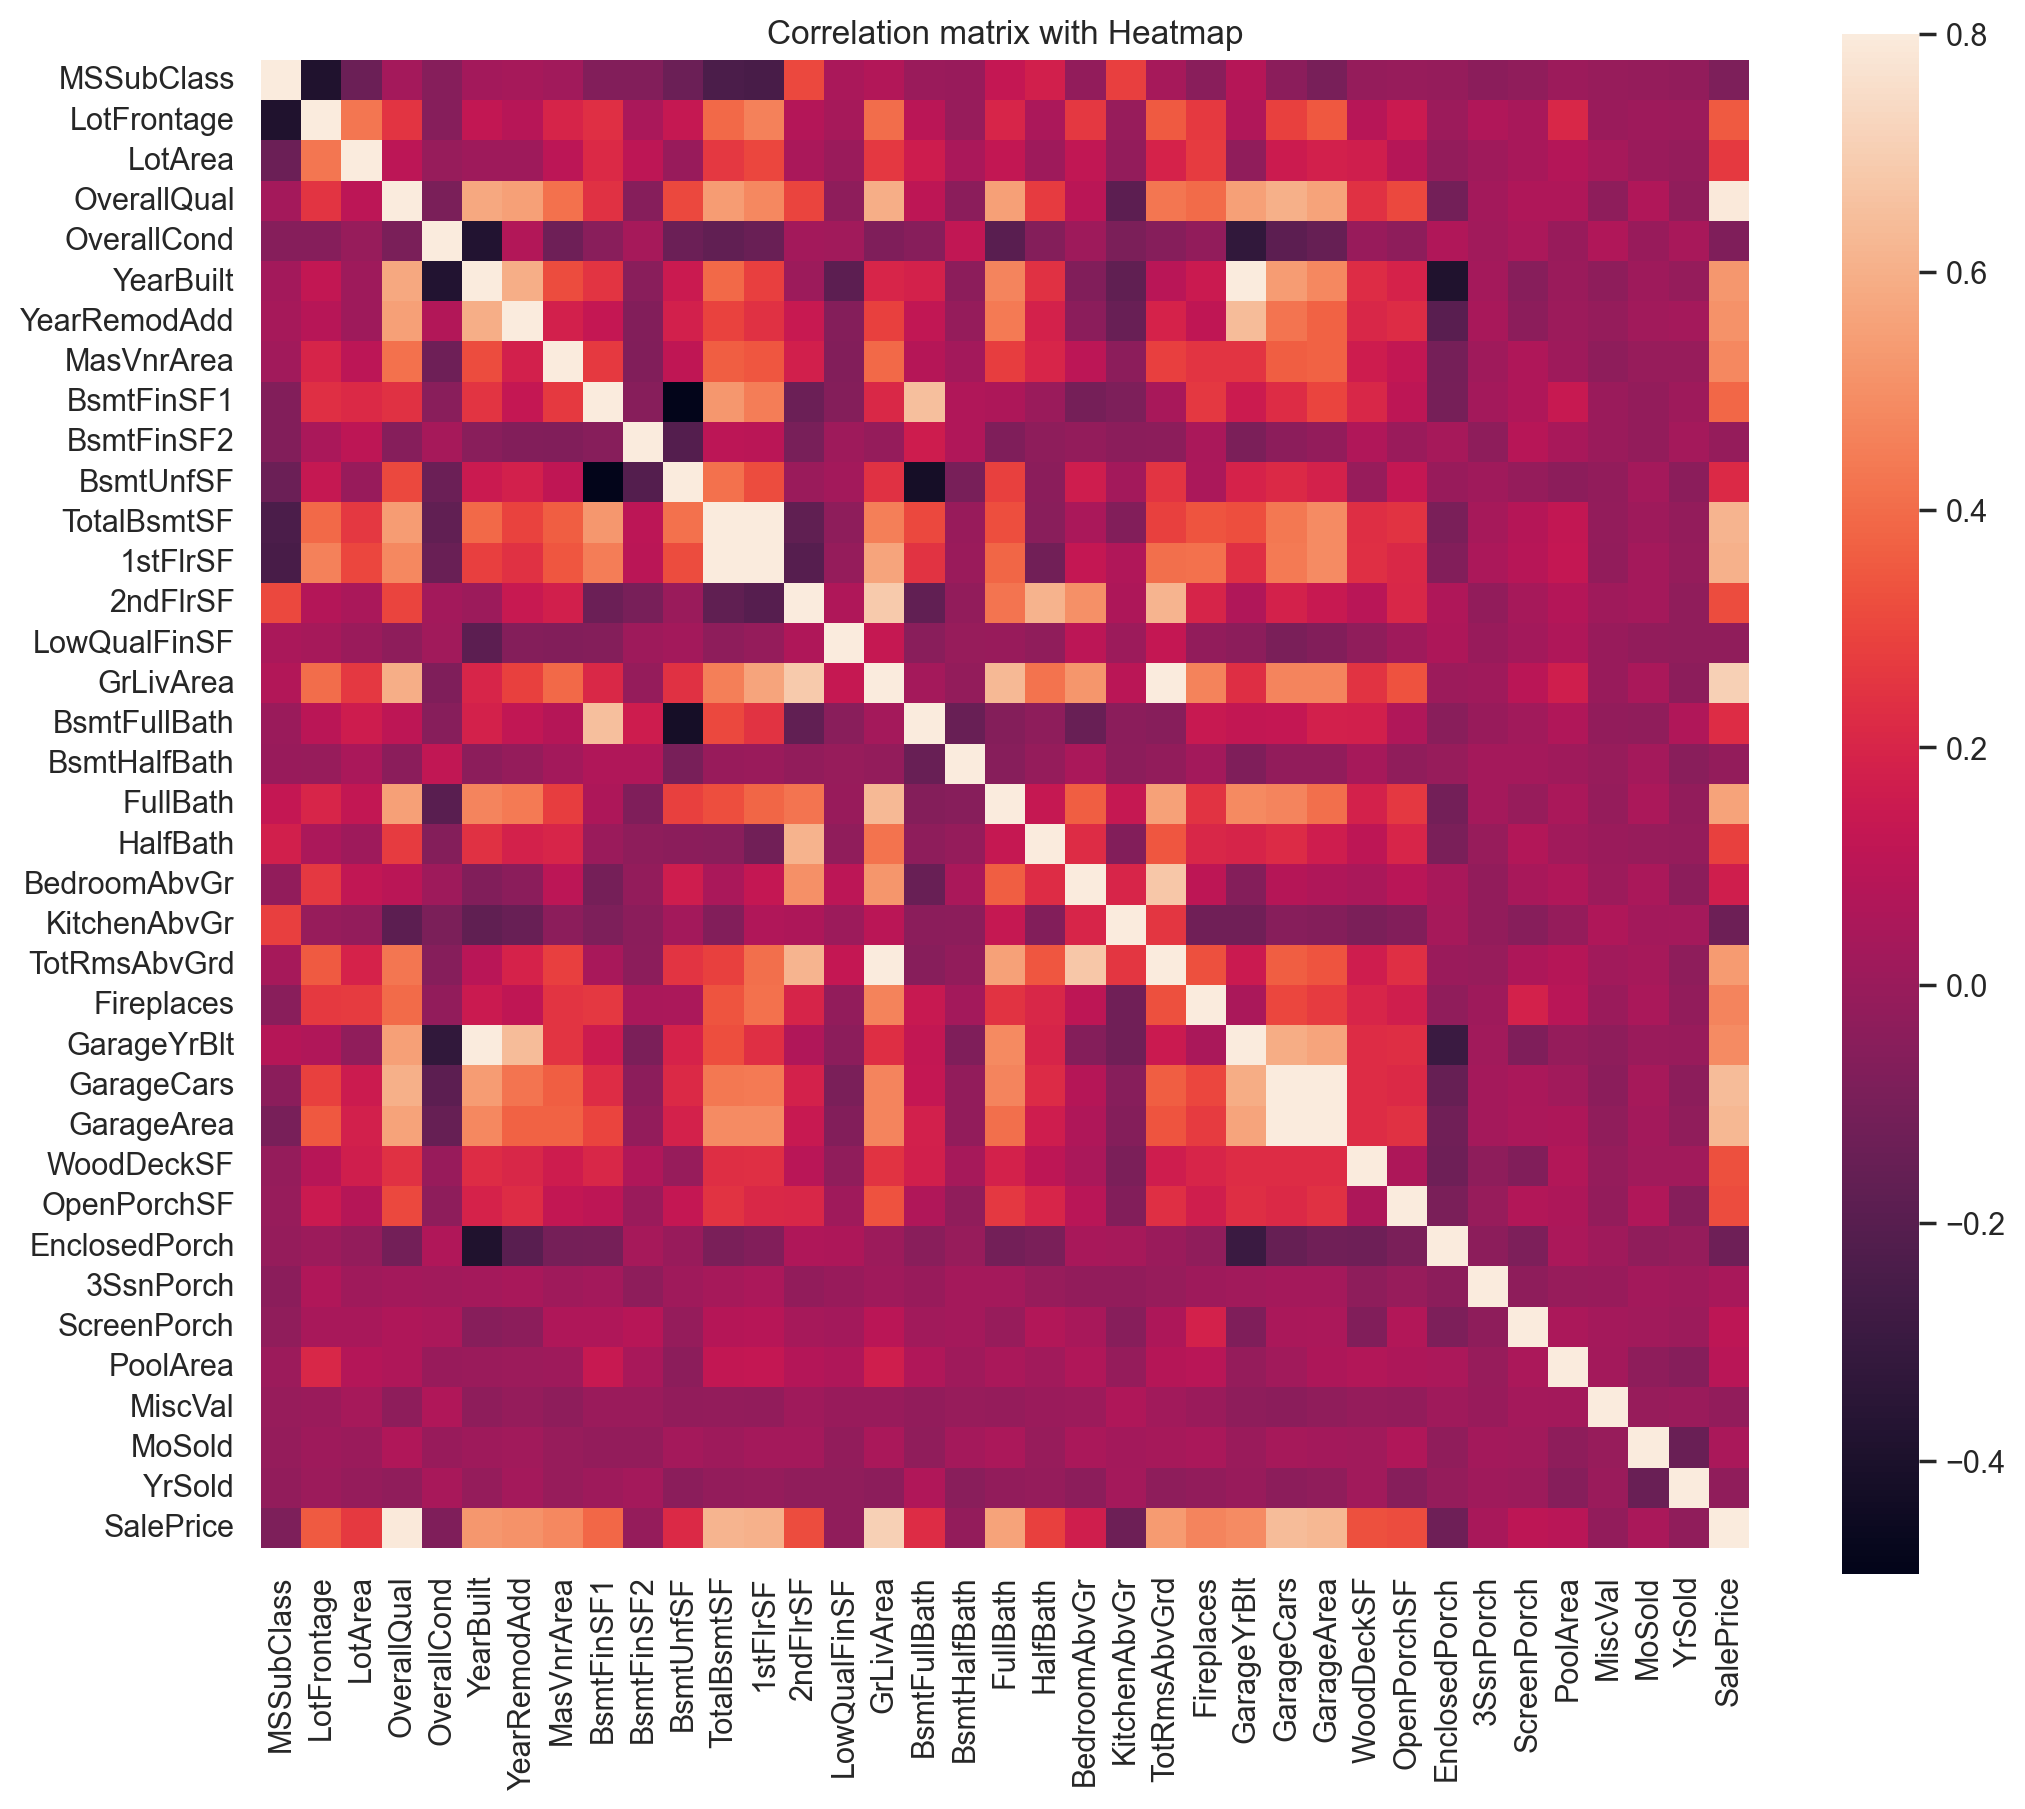

In [119]:
# corrmat: This is the correlation matrix that you want to visualize.
# vmax=.8: This sets the maximum value for the color scale. 
# Values in the correlation matrix greater than 0.8 will be represented by the same color.
# square=True: This ensures that each cell in the heatmap is square-shaped, making the heatmap look more organized and easier to interpret.

# Visualize the correlation matrix using a heatmap
corrmat = numerical_features.corr()
plt.figure(figsize = (12, 10))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.title("Correlation matrix with Heatmap")
plt.show()

**======> It’s a great summary, but wow, that’s a lot of information to look at. Let’s focus on the top 10 features most closely related to Sale Price.**

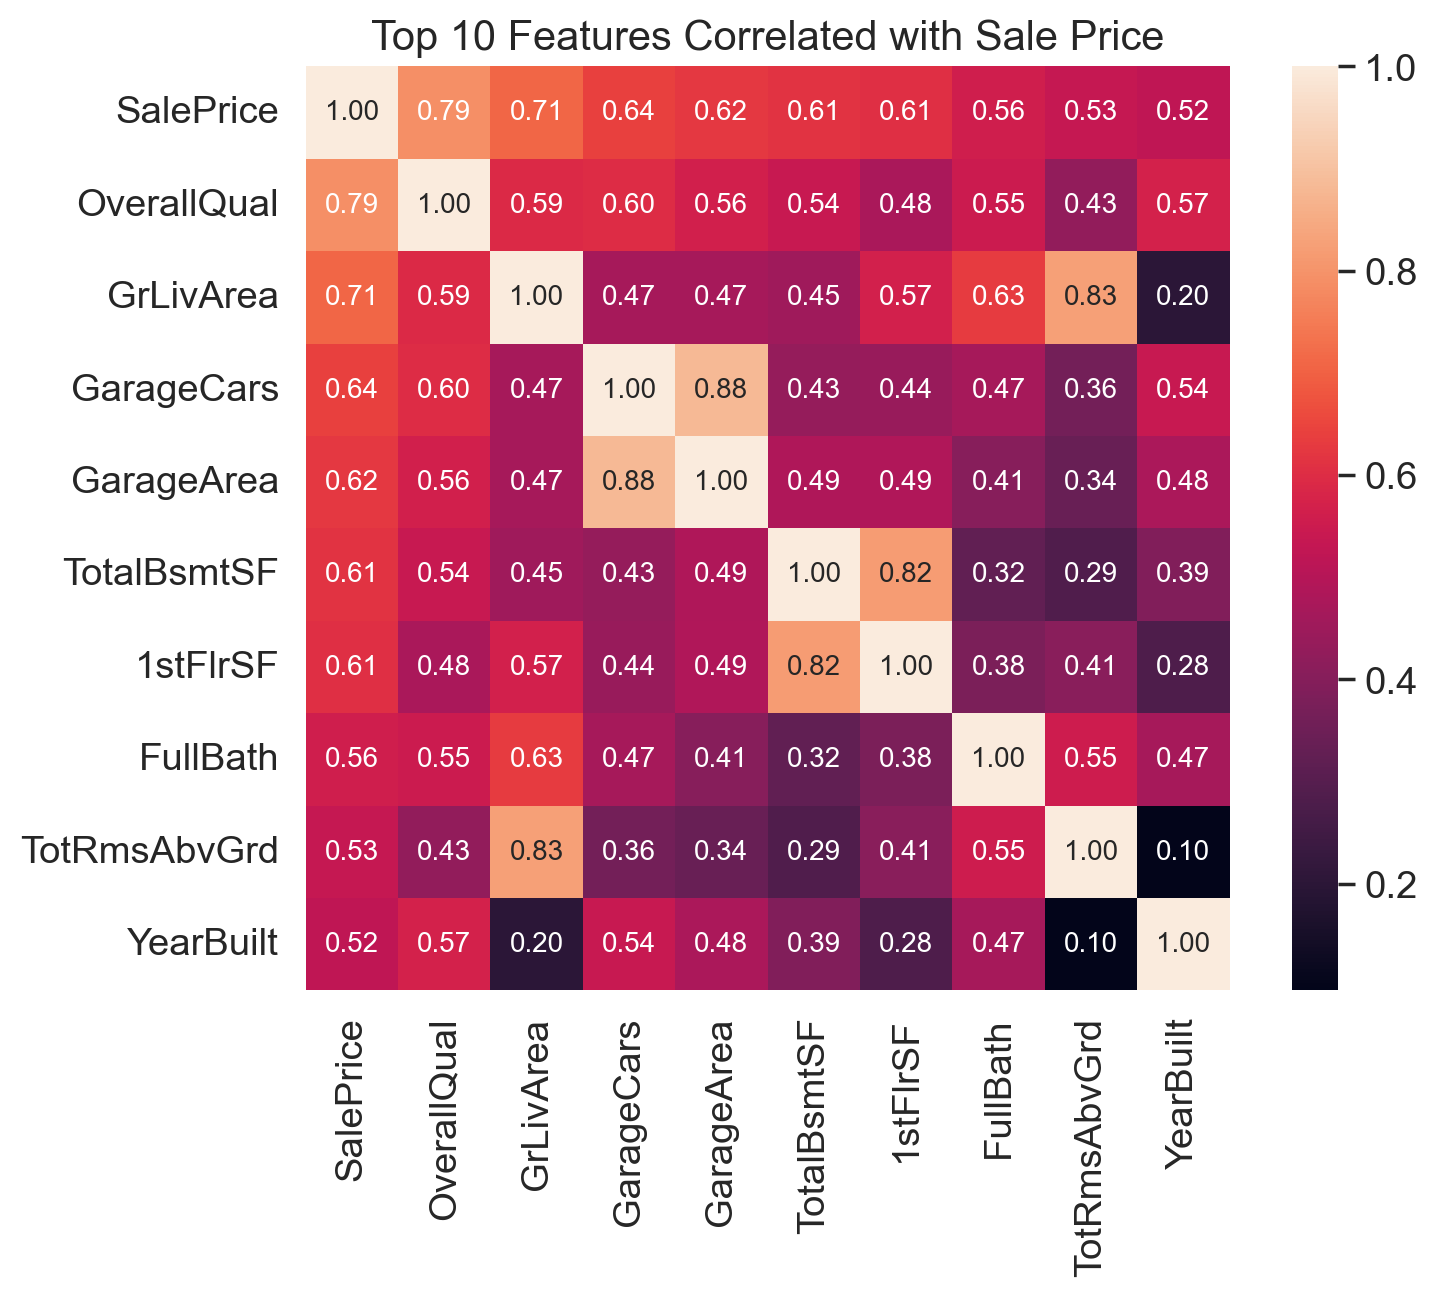

In [120]:
# Top 10 features most correlated with 'SalePrice'
k = 10

# Select the top k features most correlated with 'SalePrice'
top_features = corrmat.nlargest(k, "SalePrice")["SalePrice"].index

# Compute the correlation matrix for the selected features
top_corrmat = numerical_features[top_features].corr()

# Set the font scale for the heatmap
sns.set(font_scale=1.25)

plt.figure(figsize=(8, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(top_corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=top_features.values, xticklabels=top_features.values)
plt.title('Top 10 Features Correlated with Sale Price')
plt.show()

In [121]:
# print top ten correlated features with Sale Price
top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

#### **Let’s examine how each feature relates to Sale Price and perform any necessary pre-cleaning on each one.**

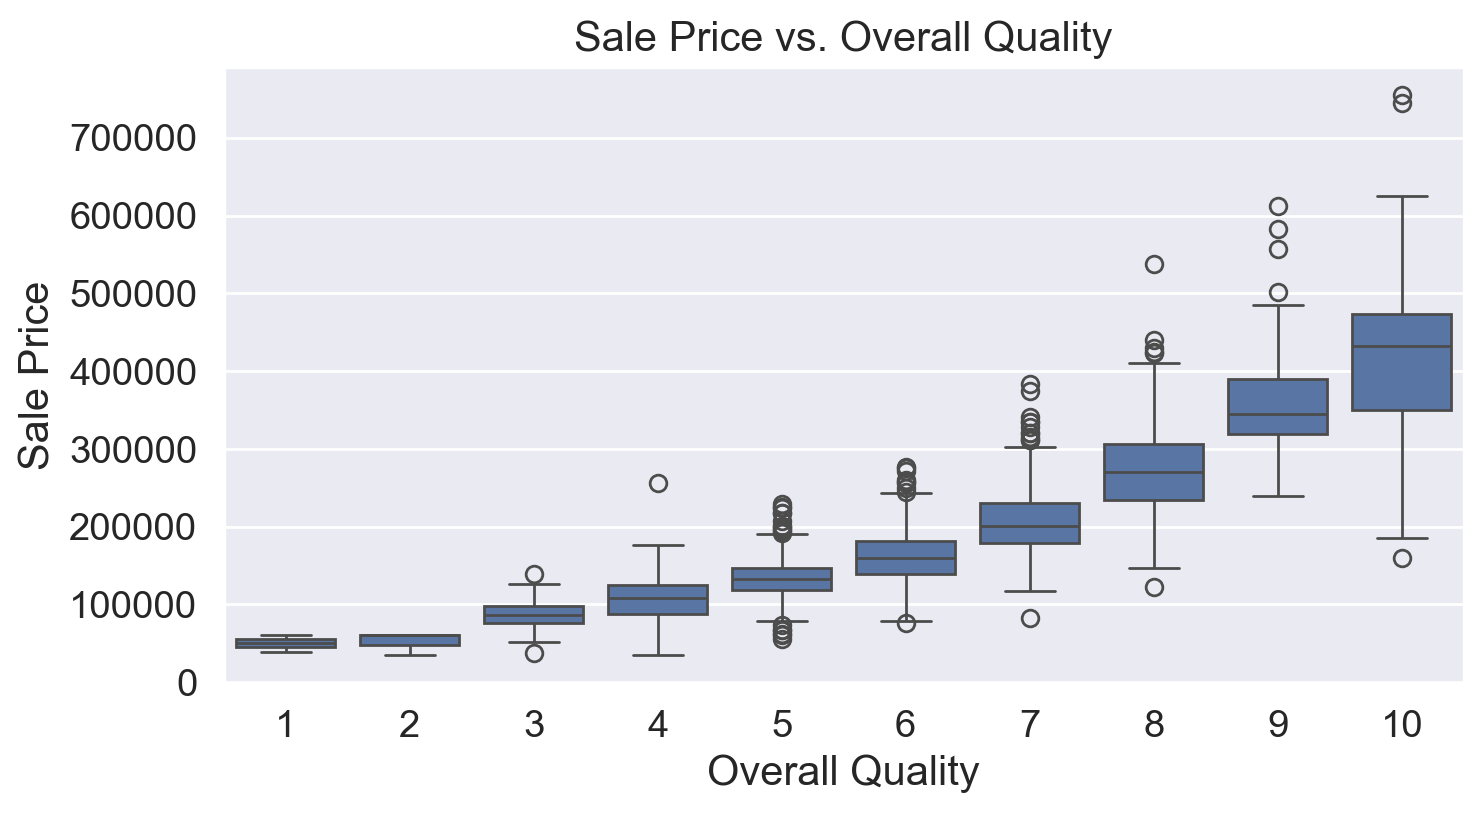

In [122]:
# Exploring the relationship between 'OverallQual' and 'SalePrice'
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

**=======> Haha, it's no surprise that better quality fetches a higher price! Nothing new here. Let's move on.**

In [123]:
# Define a function to plot a boxplot that show the relationship between target and other closest features
# A boxplot displays the distribution of data using a box and whiskers to show the minimum, first quartile (Q1), 
# median, third quartile (Q3), and maximum, helping to identify outliers and understand the data’s spread and skewness.
def plot_boxplot(x_feature, y_feature, title, xlabel, ylabel):
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = train_data[x_feature], y = train_data[y_feature])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Define a function to plot jointplot that show the relationship between target and other closest features
# Jointplot is combines scatter plots and histograms (or other types of plots) to give a comprehensive view of the data.
def plot_jointplot(x_feature, y_feature, title, xlabel, ylabel, kind='reg'):
    sns.jointplot(x = train_data[x_feature], y = train_data[y_feature], kind = kind)
    plt.suptitle(title, y=1.02)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

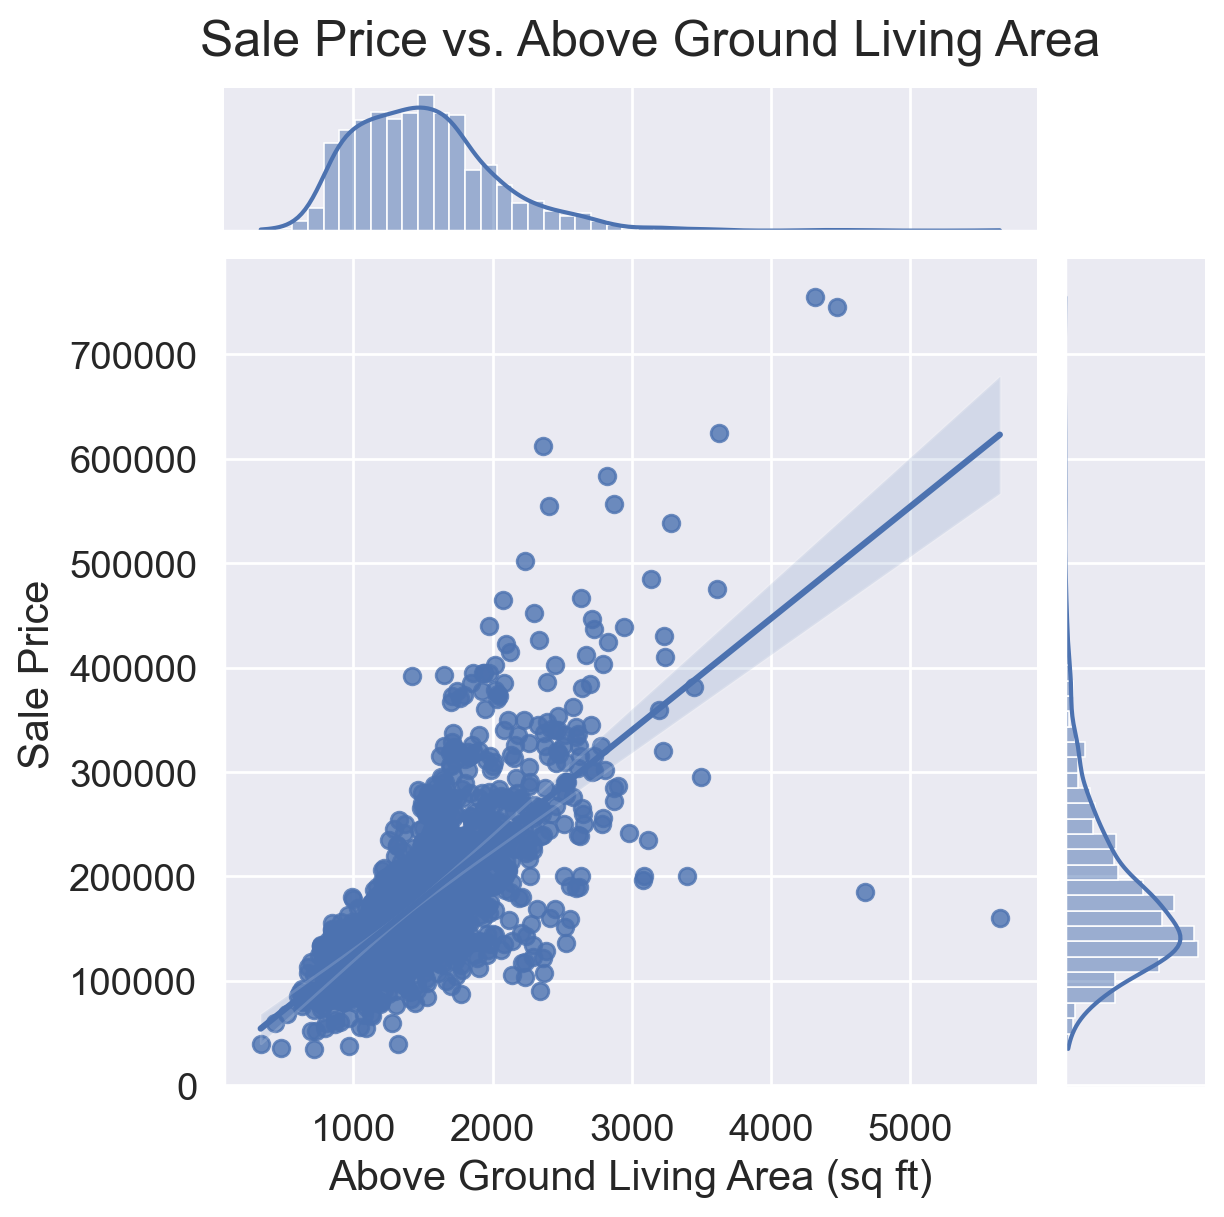

In [124]:
# Plotting 'GrLivArea' vs 'SalePrice'
plot_jointplot('GrLivArea', 'SalePrice', 'Sale Price vs. Above Ground Living Area', 'Above Ground Living Area (sq ft)', 'Sale Price')


**=======> It makes sense that people would pay more for a larger living area. However, those two outliers in the bottom-right of the plot don’t fit the pattern. Let’s remove these outliers manually to clean up our data. Ready to proceed?**

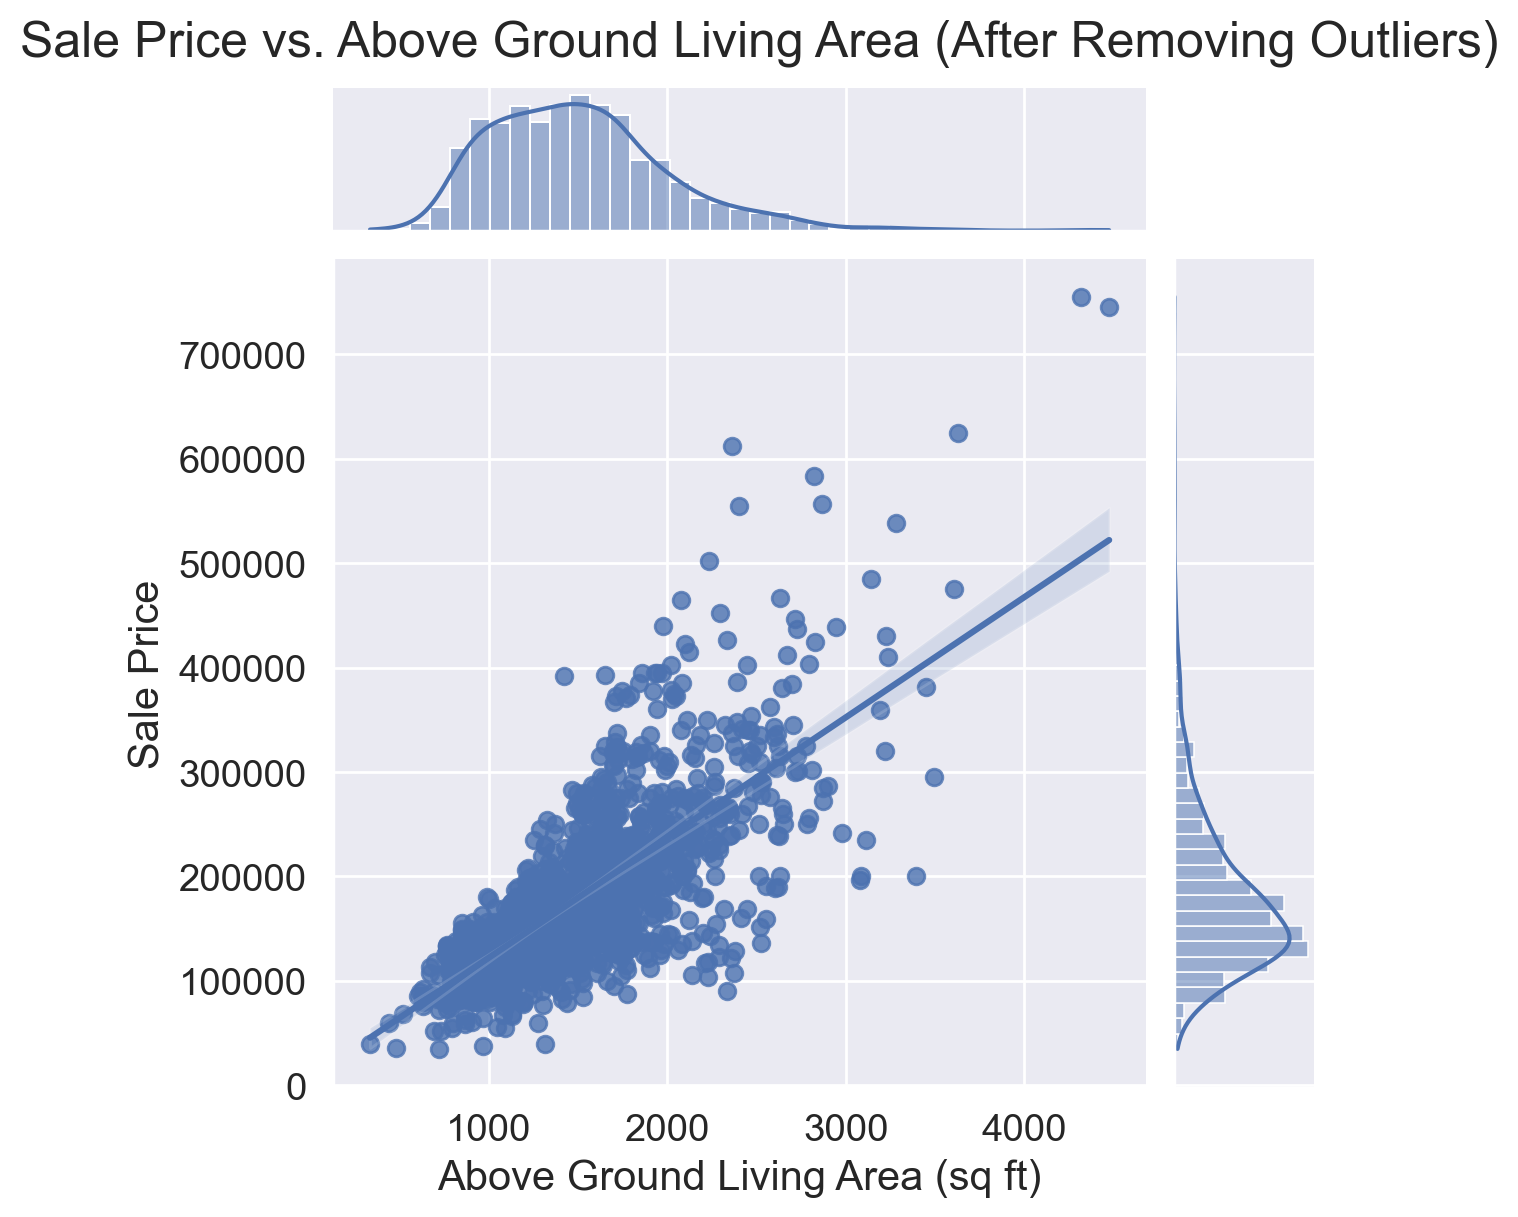

In [125]:
# Removing outliers based on 'GrLivArea'
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_jointplot('GrLivArea', 'SalePrice', 'Sale Price vs. Above Ground Living Area (After Removing Outliers)', 'Above Ground Living Area (sq ft)', 'Sale Price')


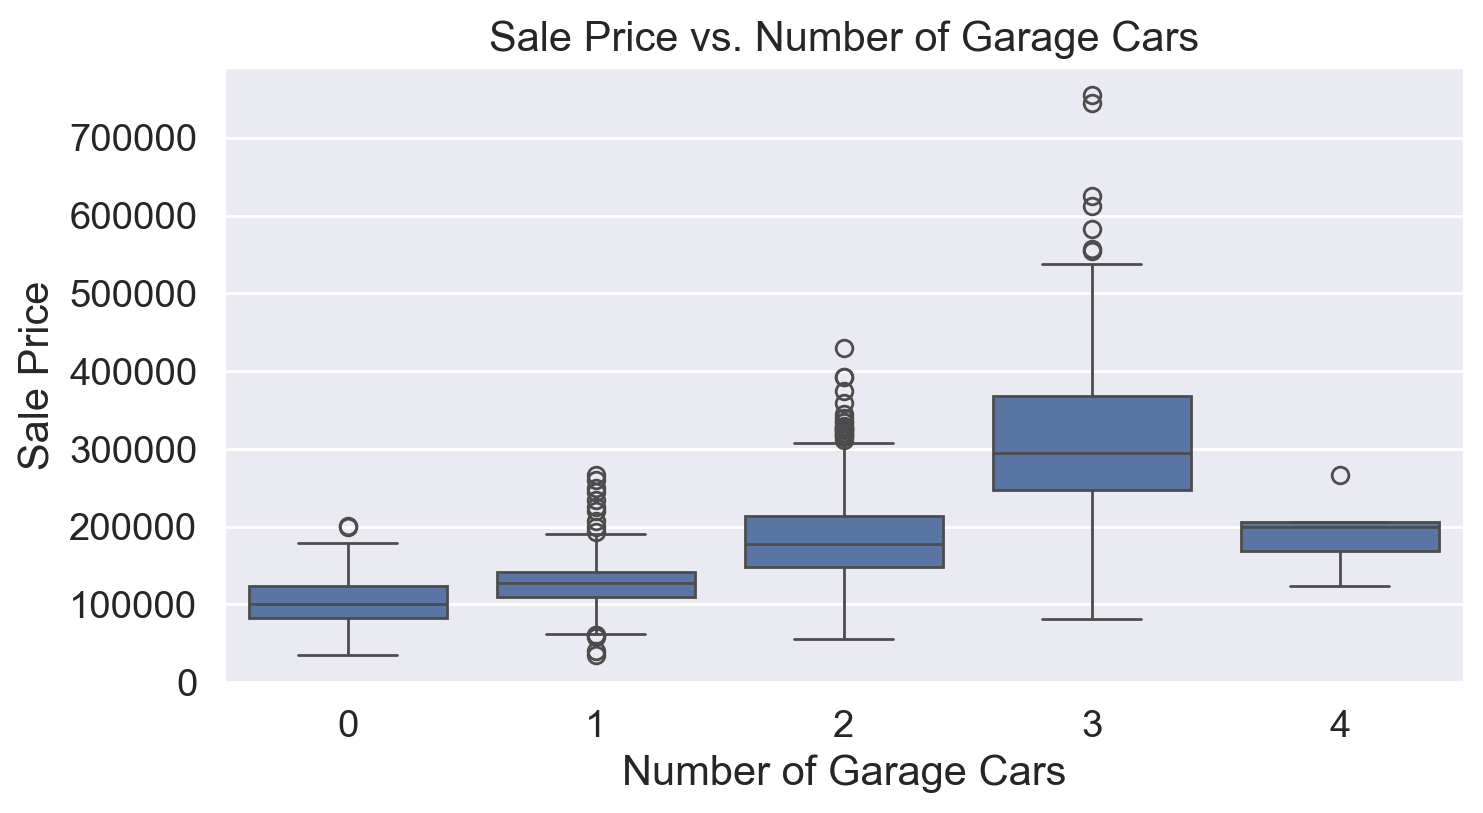

In [126]:
# Plotting 'GarageCars' vs 'SalePrice'
plot_boxplot('GarageCars', 'SalePrice', 'Sale Price vs. Number of Garage Cars', 'Number of Garage Cars', 'Sale Price')


**======> Let’s remove the entries where the garage size is 4 cars since they seem to lower the sale price.**

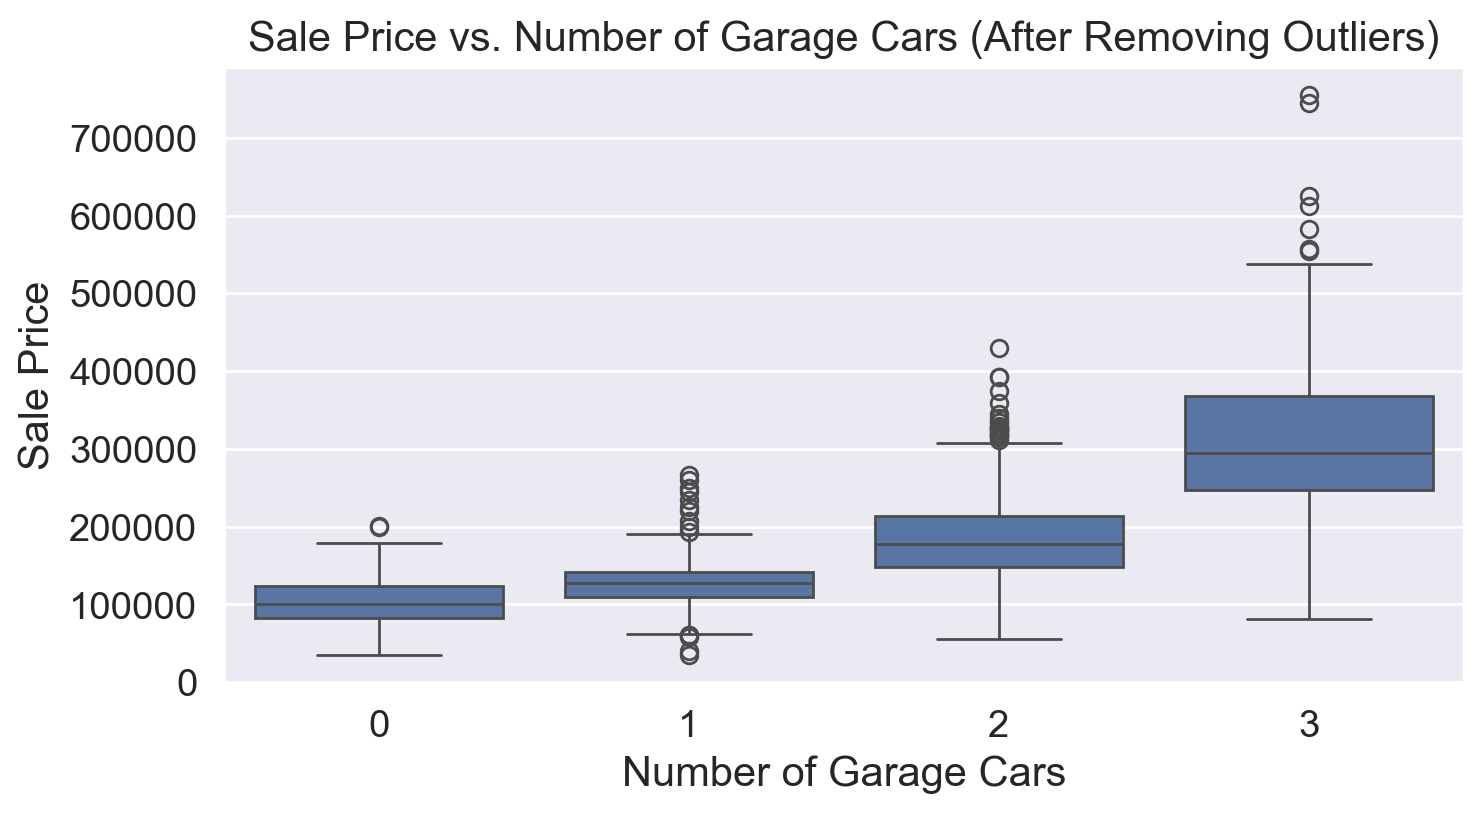

In [127]:
# Removing outliers based on 'GarageCars'
train_data = train_data.drop(train_data[(train_data['GarageCars'] > 3) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_boxplot('GarageCars', 'SalePrice', 'Sale Price vs. Number of Garage Cars (After Removing Outliers)', 'Number of Garage Cars', 'Sale Price')


**======> That looks much better. Note: removal of data is totally discretionary and may or may not help in modeling. Use at your own preference.**

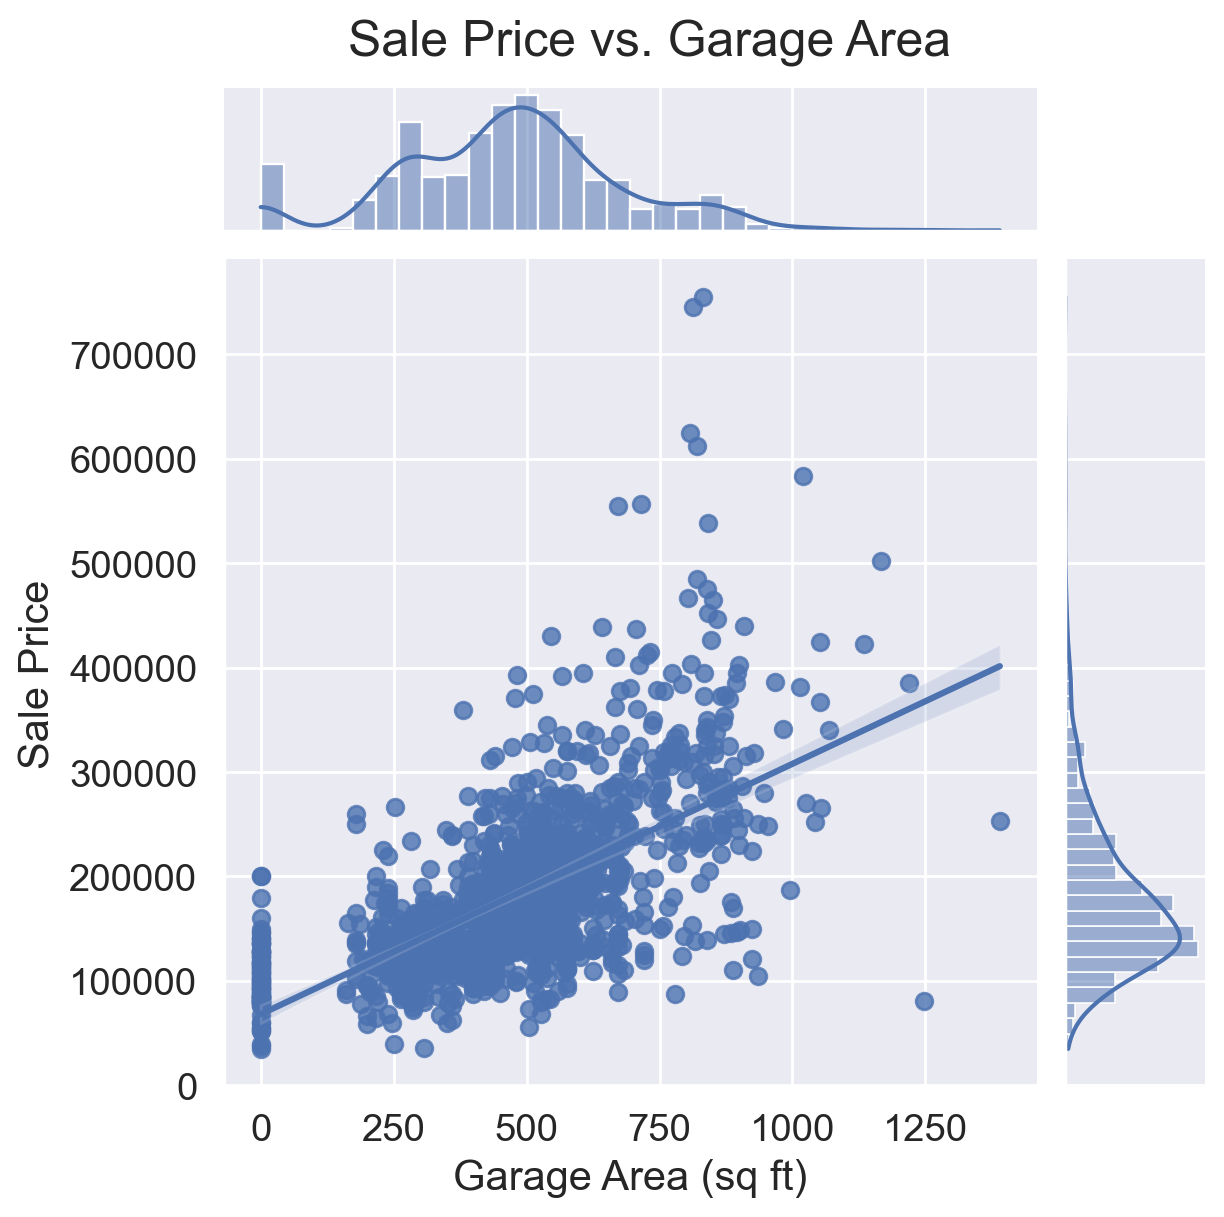

In [128]:
# Plotting 'GarageArea' vs 'SalePrice'
plot_jointplot('GarageArea', 'SalePrice', 'Sale Price vs. Garage Area', 'Garage Area (sq ft)', 'Sale Price')

**=====> Let’s exclude the last two entries from your dataset to clean it up.**

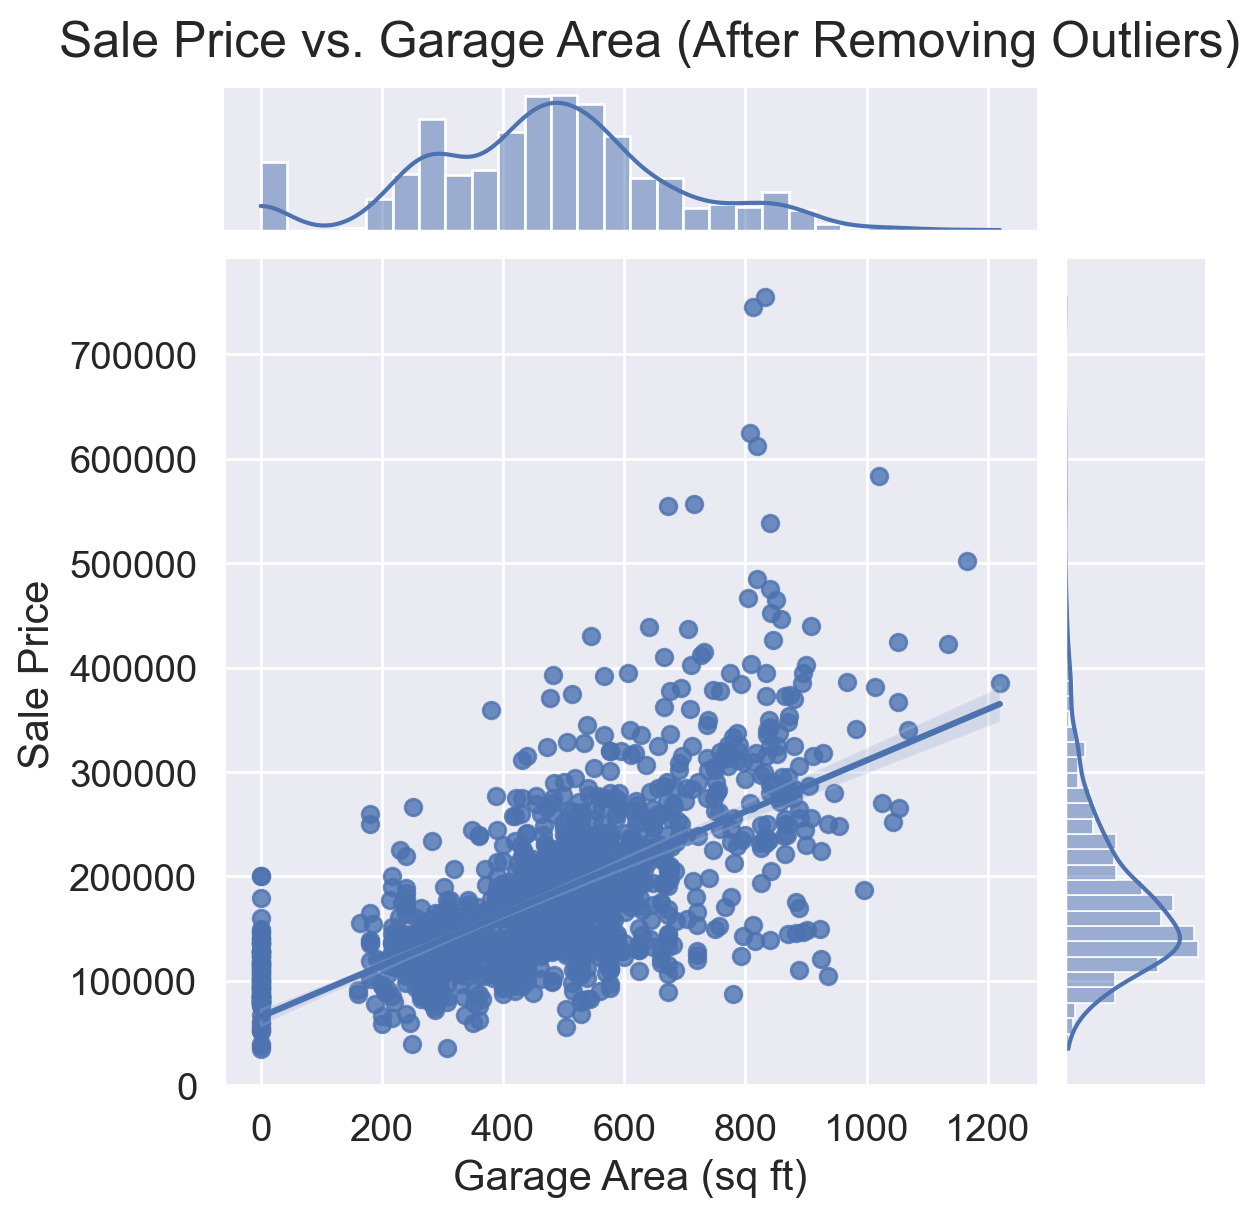

In [129]:
# Removing outliers based on 'GarageArea'
train_data = train_data.drop(train_data[(train_data['GarageArea'] > 1100) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_jointplot('GarageArea', 'SalePrice', 'Sale Price vs. Garage Area (After Removing Outliers)', 'Garage Area (sq ft)', 'Sale Price')


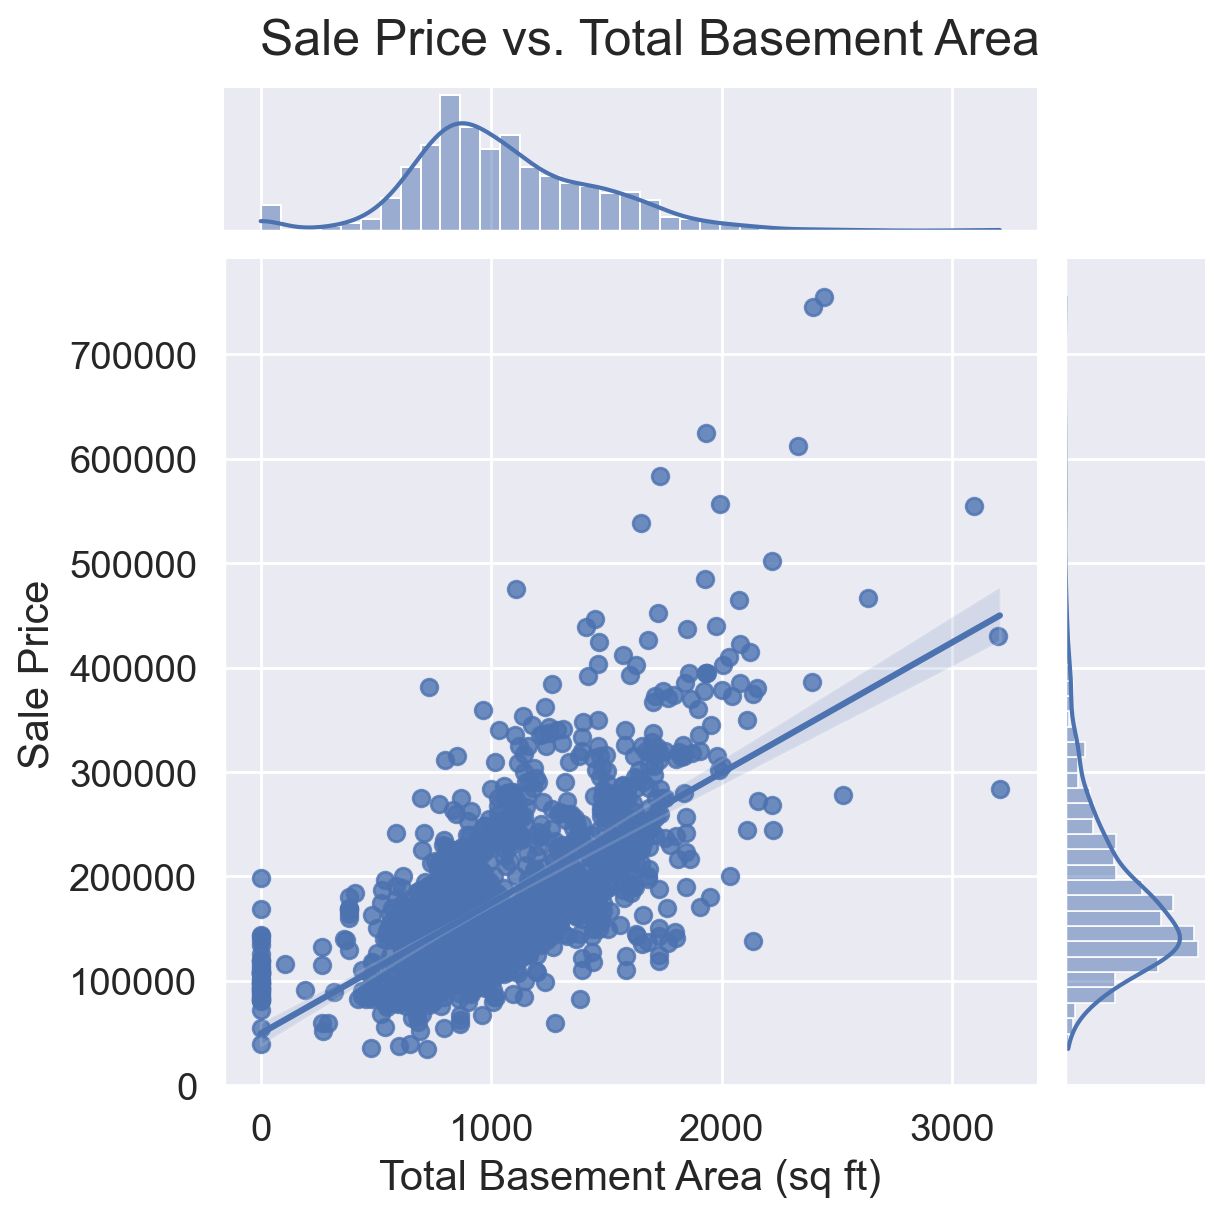

In [130]:
# Plotting 'TotalBsmtSF' vs 'SalePrice'
plot_jointplot('TotalBsmtSF', 'SalePrice', 'Sale Price vs. Total Basement Area', 'Total Basement Area (sq ft)', 'Sale Price')


**=====> Everything looks fine here.**

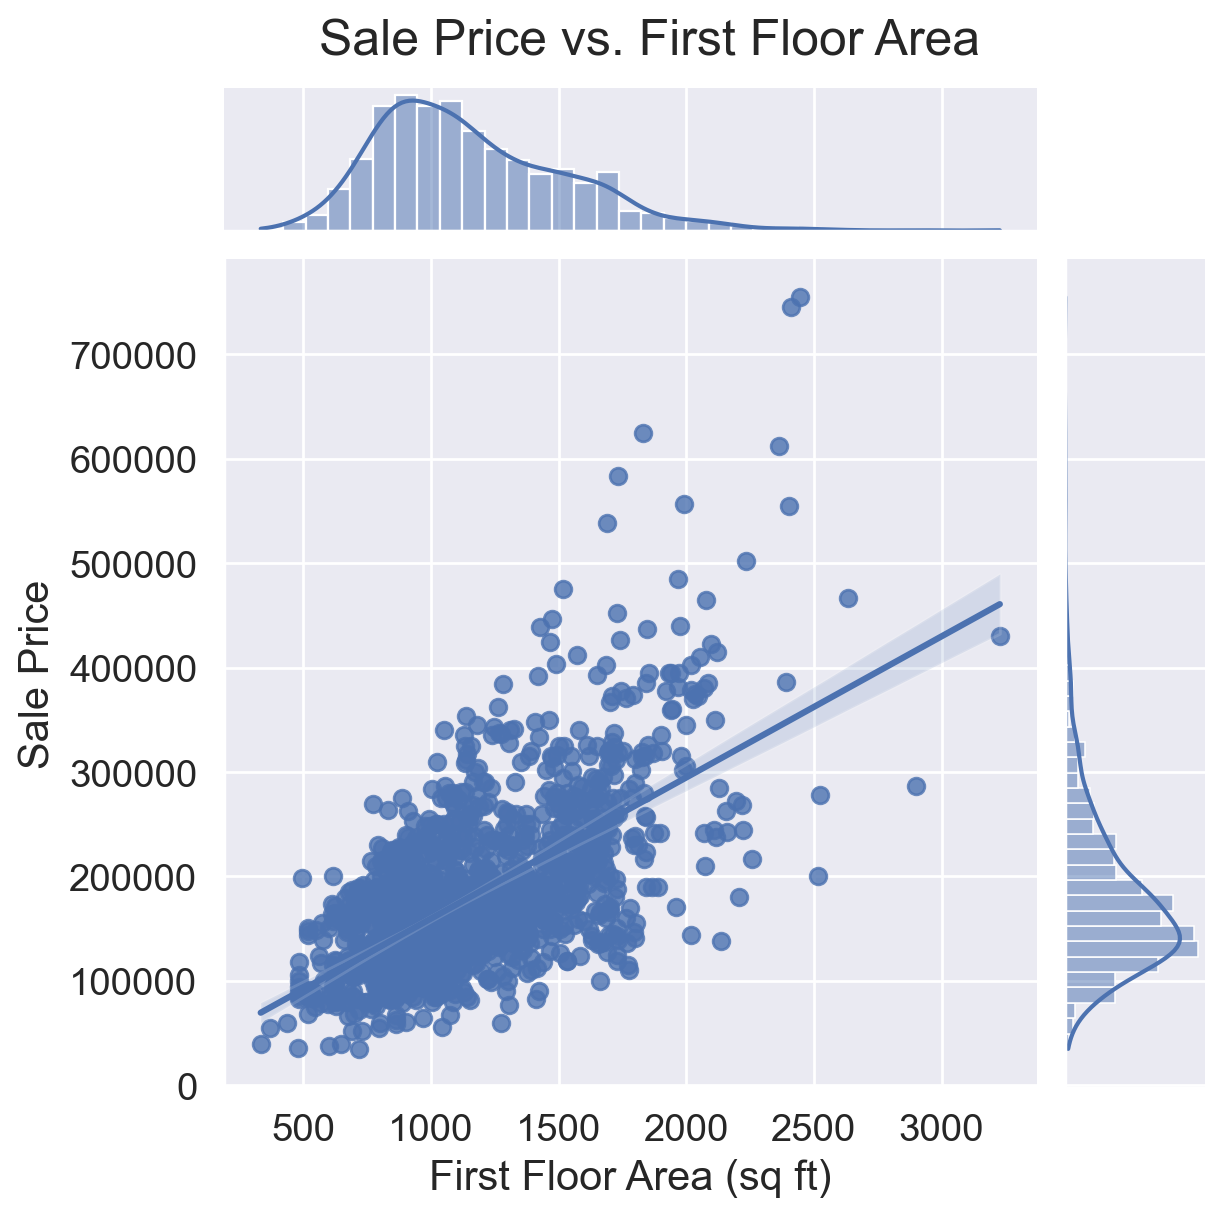

In [131]:
# Plotting '1stFlrSF' vs 'SalePrice'
plot_jointplot('1stFlrSF', 'SalePrice', 'Sale Price vs. First Floor Area', 'First Floor Area (sq ft)', 'Sale Price')


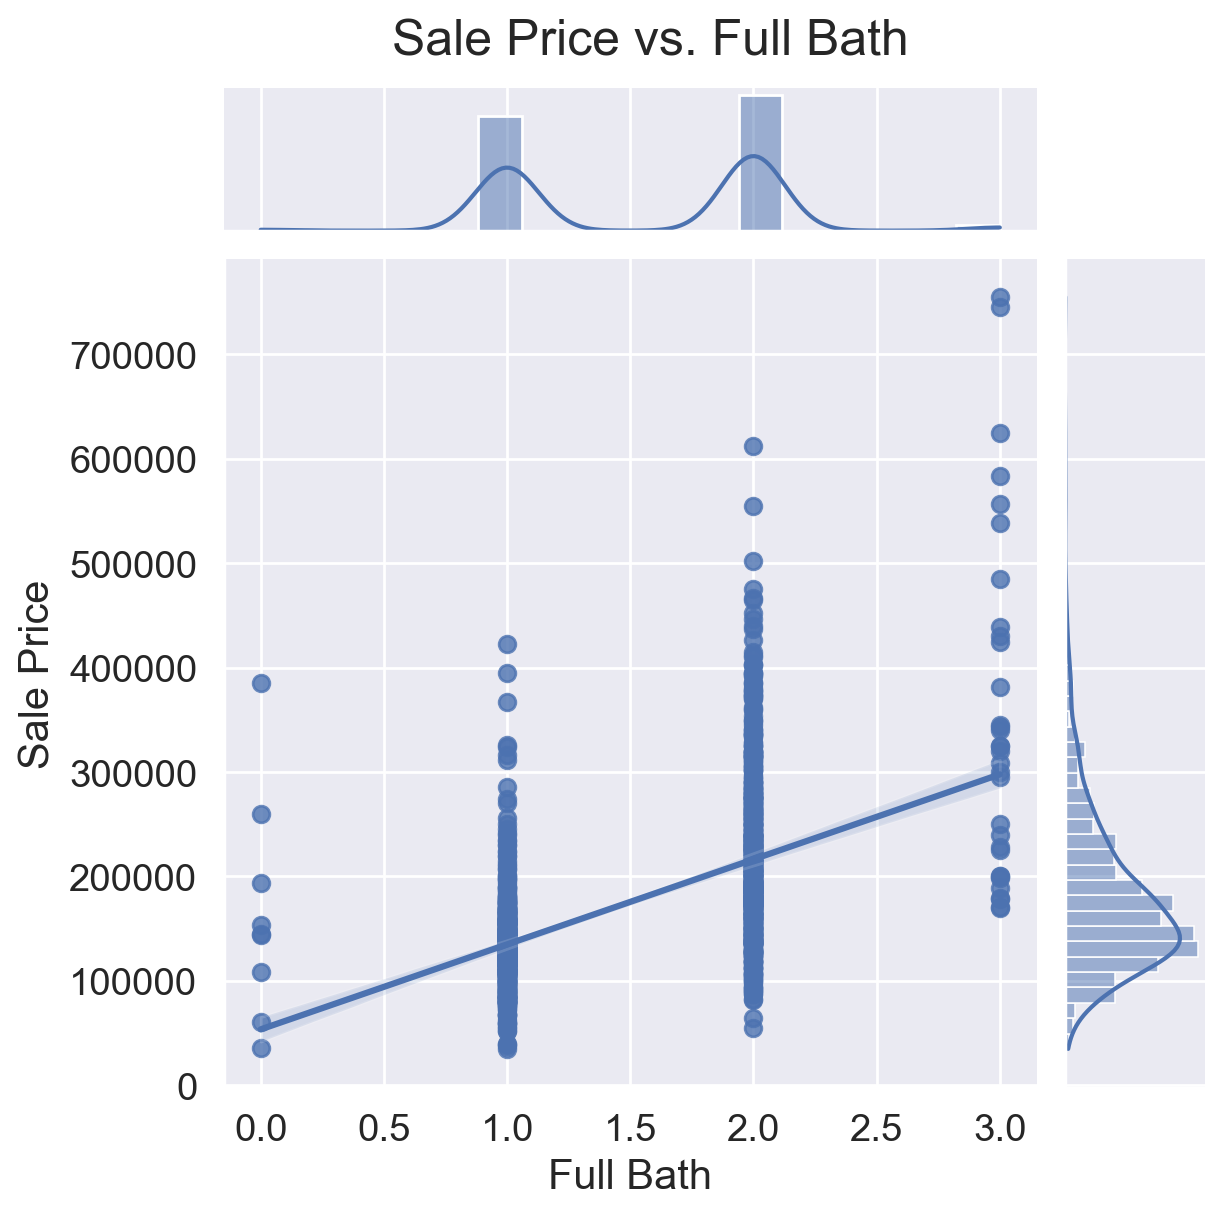

In [132]:
# plotting 'FullBath' vs 'SalePrice'
plot_jointplot('FullBath', 'SalePrice', 'Sale Price vs. Full Bath', 'Full Bath', 'Sale Price')

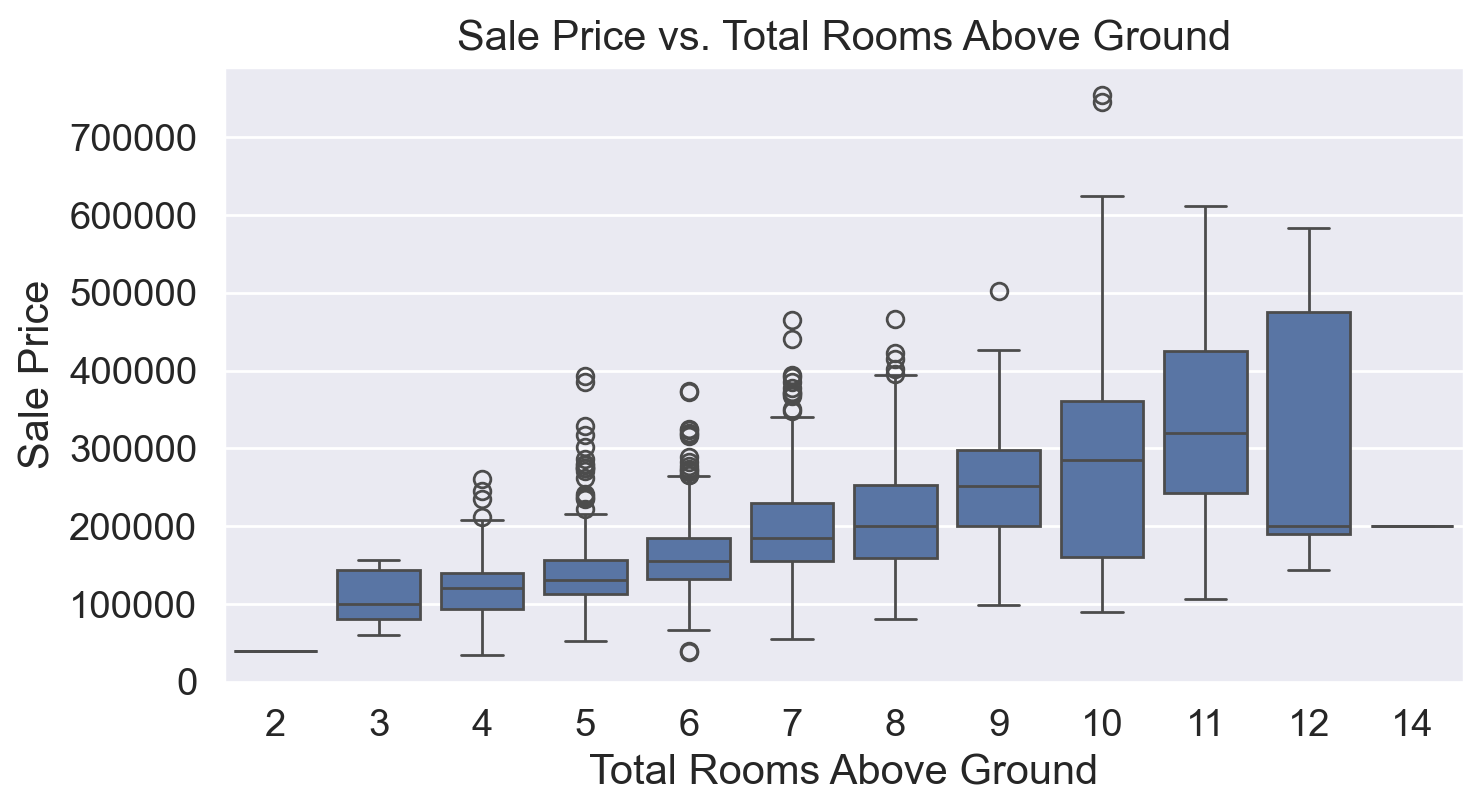

In [133]:
# Plotting 'TotRmsAbvGrd' vs 'SalePrice'
plot_boxplot('TotRmsAbvGrd', 'SalePrice', 'Sale Price vs. Total Rooms Above Ground', 'Total Rooms Above Ground', 'Sale Price')


**=====> It seems like houses with more than 11 rooms come with a $100k off coupon. It looks like an outlier but I'll let it slide.**

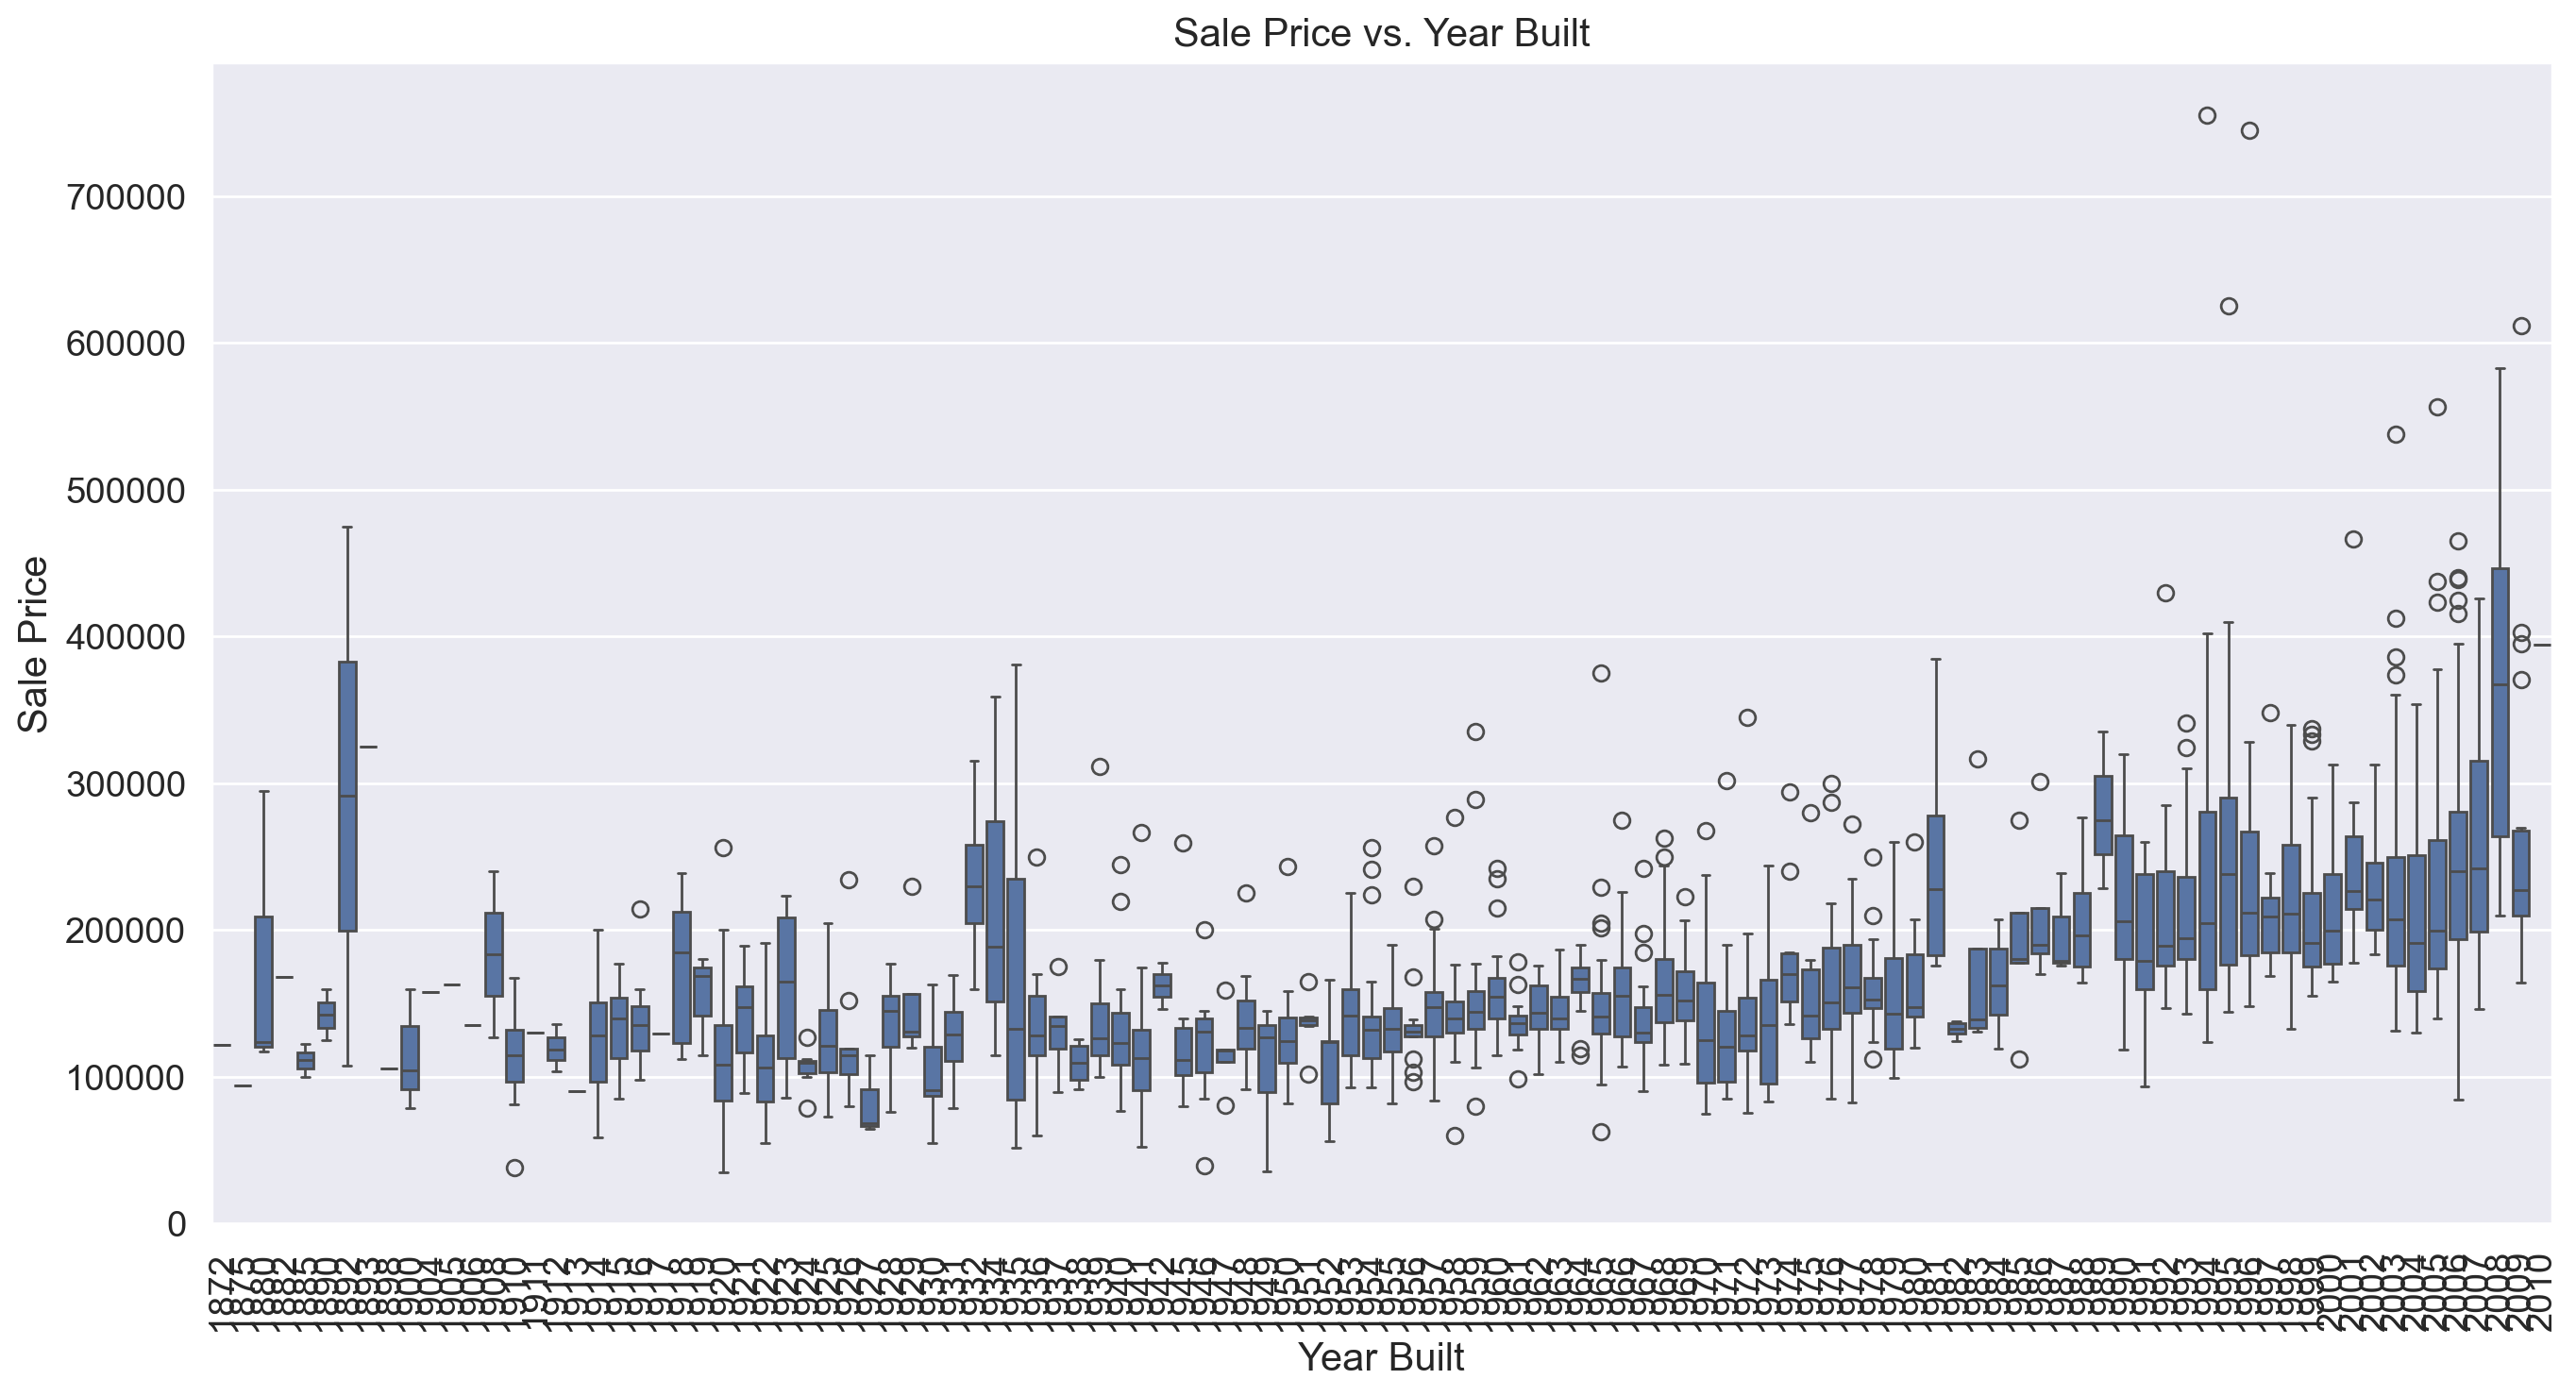

In [134]:
# Plotting 'YearBuilt' vs 'SalePrice'
plt.figure(figsize=(16, 8))
sns.boxplot(x=train_data['YearBuilt'], y=train_data['SalePrice'])
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

**=====> Although it seems like house prices decrease with age, we can't be entirely sure. Is it because of inflation or stock market crashes? Let's leave the years alone.**

### **Step:- 4. Impute Missing Data and Clean Data**
   - It's important to handle missing data for accurate model predictions.

##### **Let's combine both training and test data into one dataset to impute missing values and do some cleaning.**


In [135]:
# Combining train and test datasets for data cleaning
ntrain_data = train_data.shape[0]
ntest_data = test_data.shape[0]
y_train_data = train_data['SalePrice'].values 

# Combine train and test datasets into one
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)

# Drop 'SalePrice' from the combined dataset since it's only in train
all_data.drop(['SalePrice'], axis=1, inplace=True)  

print(f"Train data size: {train_data.shape}")  
print(f"Test data size: {test_data.shape}") 
print(f"Combined dataset size: {all_data.shape}")

Train data size: (1451, 80)
Test data size: (1459, 79)
Combined dataset size: (2910, 79)


In [136]:
# display the combined dataset
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [137]:
# Find the missing data
all_data.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      485
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

##### **Finding missing data**


In [138]:
# Calculate the percentage of missing values for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100  

# Drop features with no missing values and sort by missing percentage
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)  

# Create a DataFrame to show features with missing data
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})  

# Print the top 20 features with the highest percentage of missing data
print(missing_data.head(20))  

              Missing Ratio
PoolQC            99.690722
MiscFeature       96.426117
Alley             93.230241
Fence             80.412371
MasVnrType        60.584192
FireplaceQu       48.659794
LotFrontage       16.666667
GarageFinish       5.463918
GarageQual         5.463918
GarageCond         5.463918
GarageYrBlt        5.463918
GarageType         5.395189
BsmtExposure       2.817869
BsmtCond           2.817869
BsmtQual           2.783505
BsmtFinType2       2.749141
BsmtFinType1       2.714777
MasVnrArea         0.790378
MSZoning           0.137457
BsmtFullBath       0.068729


##### **Visualizing the percentage of missing data by feature**


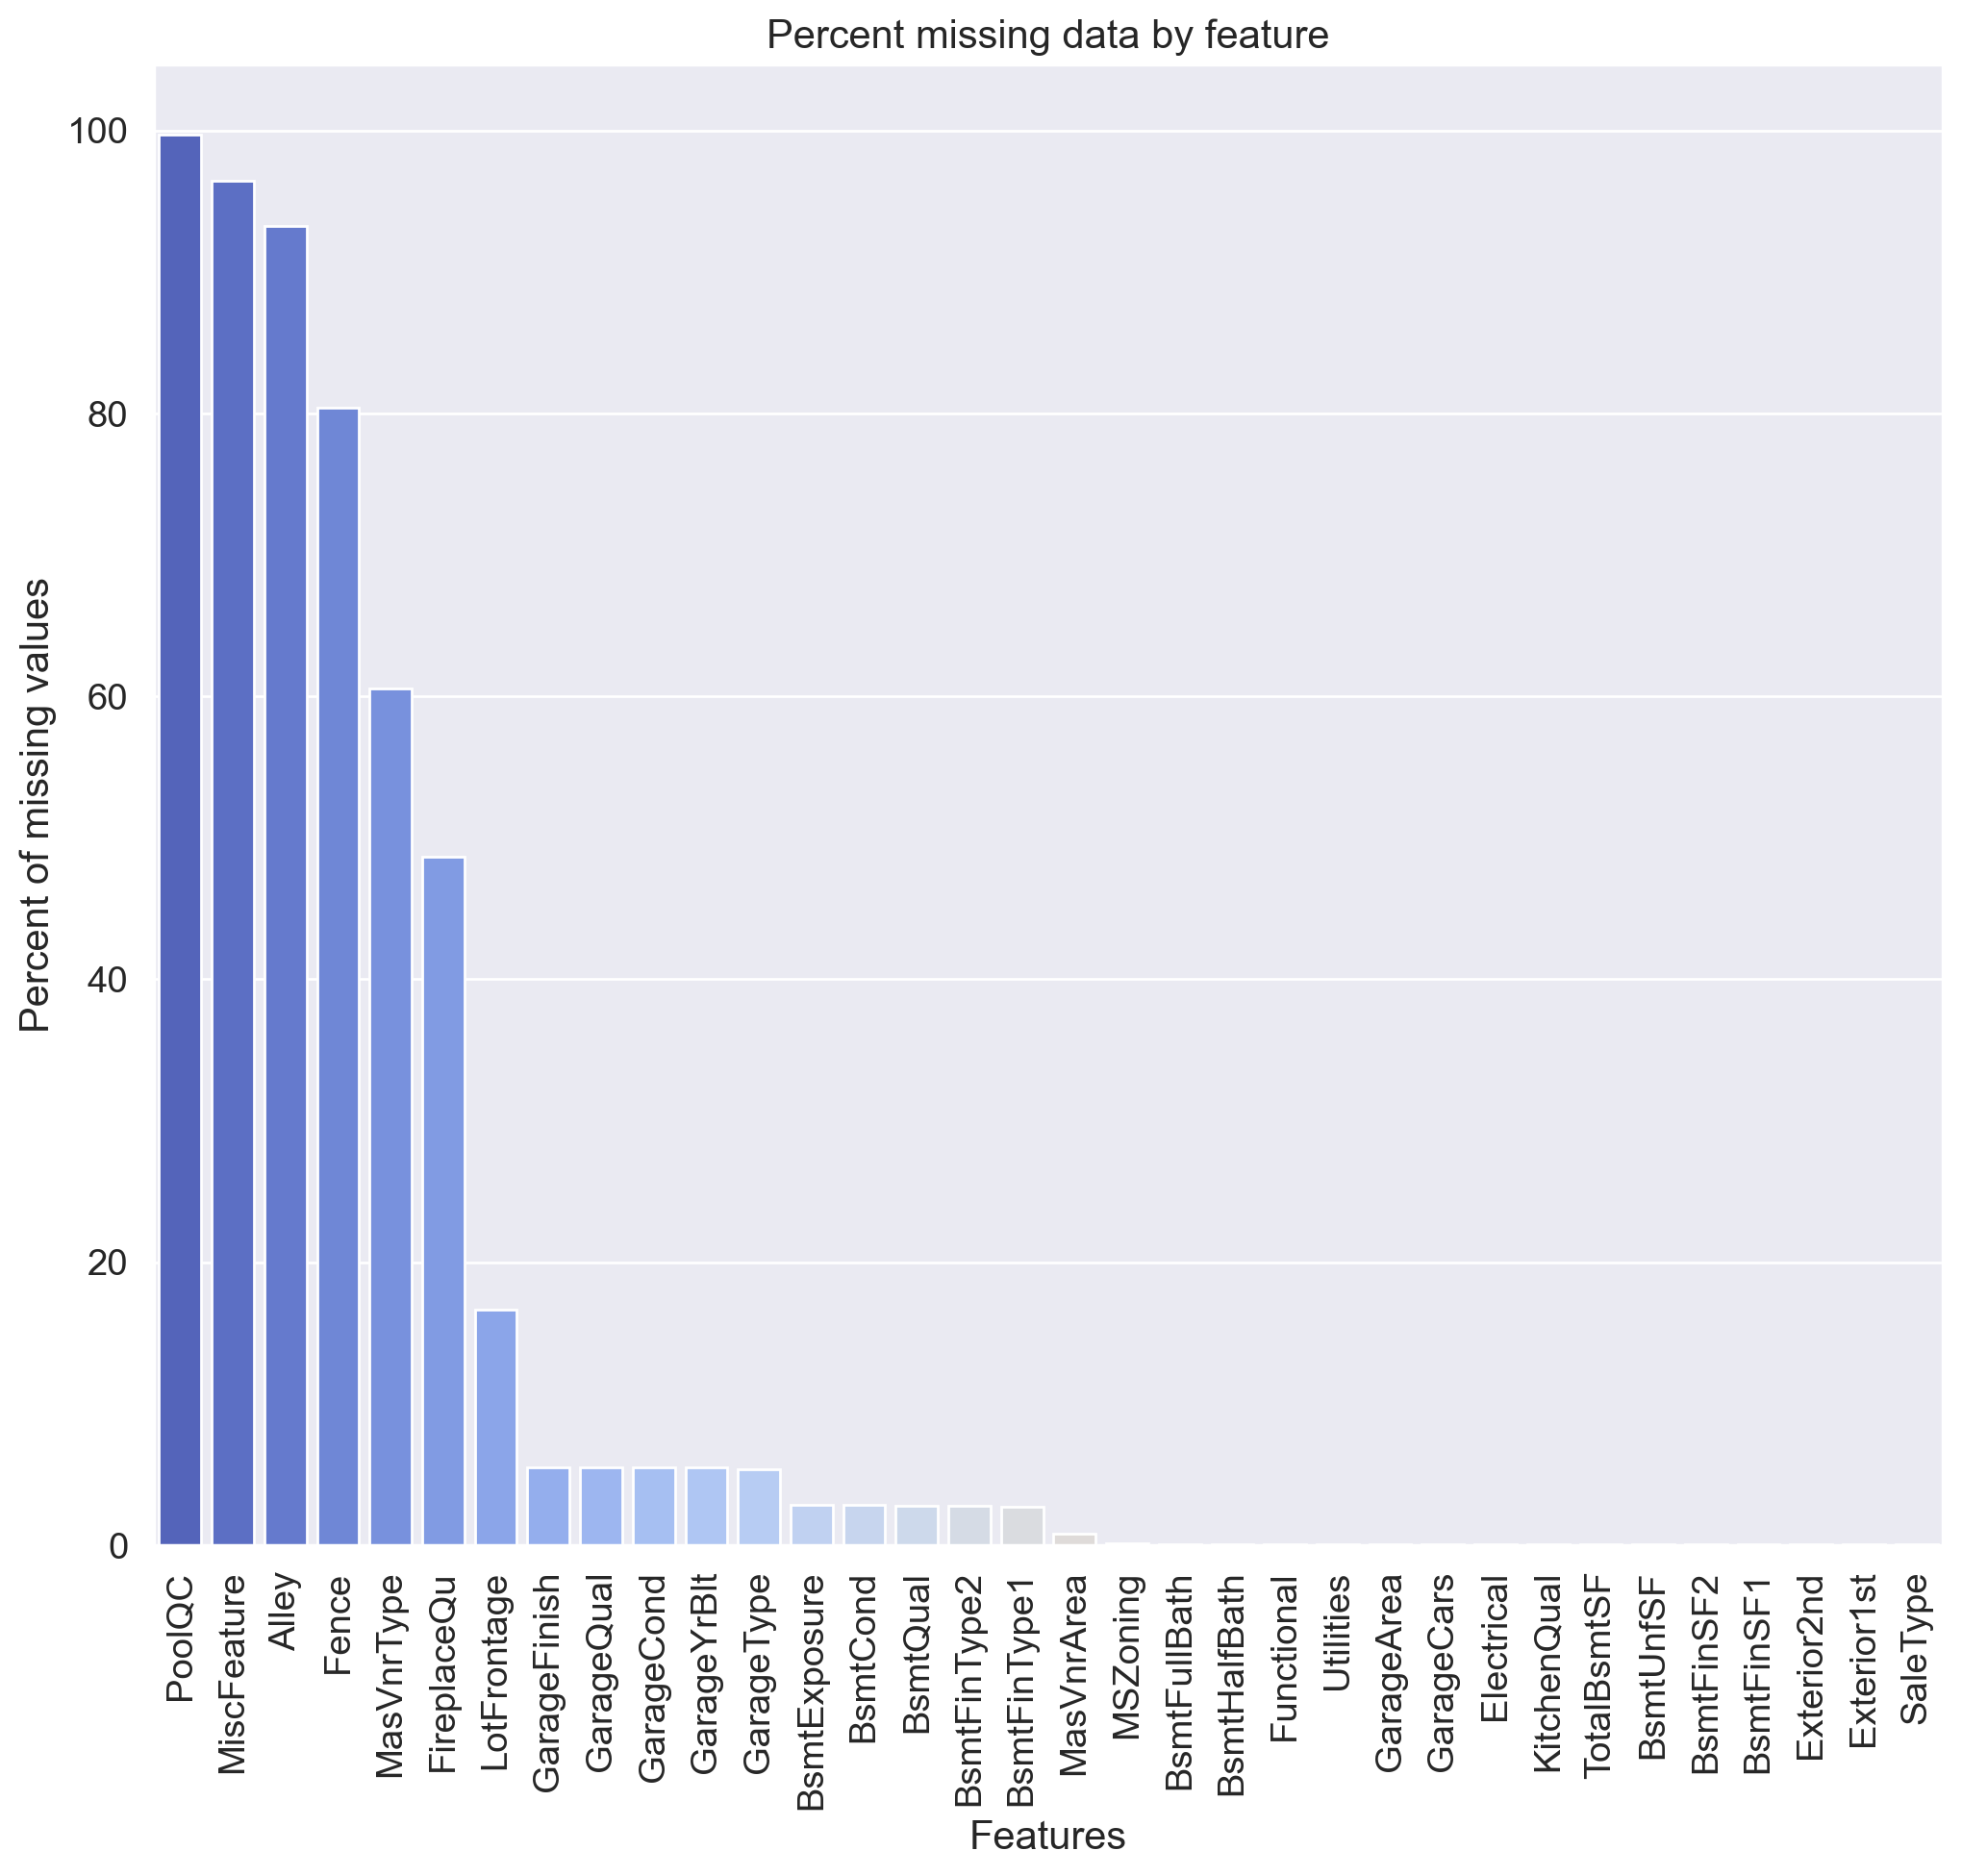

In [139]:
# Set a custom color palette (you can choose your own colors)
custom_colors = sns.color_palette("coolwarm", len(all_data_na))

# Create the figure and bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=all_data_na.index, y=all_data_na, palette=custom_colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')

# Show the plot
plt.show()


### **Imputing missing values based on feature descriptions**

1. **PoolQC**: According to the data description, NA indicates "No Pool." We can impute missing values with "None."

2. **MiscFeature**: NA in this feature suggests "No miscellaneous feature." We'll replace missing values with "None."

3. **Alley**: NA signifies "No alley access." Impute missing values with "None."

4. **Fence**: NA represents "No fence." We can fill missing values with "None."

5. **FireplaceQu**: NA means "No fireplace." We'll replace missing values with "None."

6. **LotFrontage**: Since the LotFrontage (linear feet of street connected to the property) is likely similar among neighboring houses, we can impute missing values by using the median LotFrontage of the neighborhood.

7. **GarageType, GarageFinish, GarageQual, and GarageCond**: Missing data indicates the absence of a garage. We'll replace missing values with "None."

8. **GarageYrBlt, GarageArea, and GarageCars**: Missing values should be replaced with 0, indicating no garage.

9. **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath**: Missing data indicates no basement. We'll replace missing values with 0.

10. **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2**: For all these categorical basement-related features, NA suggests the absence of a basement. Impute missing values with "None."

11. **MasVnrArea and MasVnrType**: NA most likely means no masonry veneer. We'll replace missing values with 0 for **"MasVnrArea"** and "None" for **"MasVnrType"**.

12. **MSZoning**: "RL" is the most common zoning classification. We'll impute missing values with "RL."

13. **Utilities**: This feature is almost entirely "AllPub" (public utilities) except for one "NoSeWa" (no sewer/water) and two missing values. Since these few variations won't help predictive modeling, we can safely remove this feature.

14. **Functional**: According to the data description, NA suggests typical functionality. We'll replace missing values with "Typ" (Typical).

15. **Electrical**: There is one missing value, and since "SBrkr" (circuit breaker) is the most common, we'll impute the missing value with "SBrkr."

16. **KitchenQual**: Only one NA value exists. Like Electrical, we'll set the most frequent value, "TA" (Typical/Average), for the missing entry.

17. **Exterior1st and Exterior2nd**: Both features have only one missing value. We'll substitute the missing values with the most common value.

18. **SaleType**: We'll fill the missing value with the most frequent category, "WD" (Warranty Deed - Conventional).

19. **MSSubClass**: NA most likely indicates no specific building class. We'll replace missing values with "None."

In [140]:
# Imputing missing values based on feature descriptions

# Fill missing 'PoolQC' with 'None', indicating no pool
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')  

# Fill missing 'MiscFeature' with 'None', indicating no miscellaneous feature
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')  

# Fill missing 'Alley' with 'None', indicating no alley access
all_data['Alley'] = all_data['Alley'].fillna('None')  

# Fill missing 'Fence' with 'None', indicating no fence
all_data['Fence'] = all_data['Fence'].fillna('None')  

# Fill missing 'FireplaceQu' with 'None', indicating no fireplace
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')  

In [141]:
# Filling missing LotFrontage by the median value of the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))  

In [142]:
# Filling missing Garage features

# Iterate over categorical garage features
# Fill missing garage-related features with 'None', indicating no garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):  
    all_data[col] = all_data[col].fillna('None')  

# Iterate over numerical garage features
# Fill missing garage-related features with 0, indicating no garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):  
    all_data[col] = all_data[col].fillna(0)  

# Filling missing Basement features
# Iterate over numerical basement features
# Fill missing basement-related features with 0, indicating no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)  

 # Iterate over categorical basement features
 # Fill missing basement-related features with 'None', indicating no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'): 
    all_data[col] = all_data[col].fillna('None')  


In [143]:
# Filling missing 'MasVnrArea' and 'MasVnrType'

# Fill missing 'MasVnrType' with 'None', indicating no masonry veneer
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')  

# Fill missing 'MasVnrArea' with 0, indicating no masonry veneer
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)  

# Fill missing 'MSZoning' with the mode (most frequent value)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])  

# Filling missing 'Electrical' by the mode
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])  

# Filling missing 'KitchenQual' by the mode
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])  

# Filling missing 'Exterior1st' and 'Exterior2nd' by the mode
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])  
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) 

# Filling missing 'SaleType' by the mode
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])  

# Filling missing 'Functional' with "Typ" (Typical functionality)
all_data['Functional'] = all_data['Functional'].fillna('Typ')  

# Dropping the 'Utilities' feature as it doesn't provide useful information
all_data.drop(['Utilities'], axis=1, inplace=True)



In [144]:
# Checking if there are any missing values left

# Recalculate the percentage of missing values for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100  

# Drop features with no missing values and sort by missing percentage
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)  

# Create a DataFrame to show features with remaining missing data
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})  

# Print the remaining features with missing data (if any)
print(missing_data)  

Empty DataFrame
Columns: [Missing Ratio]
Index: []


### **Step:- 5. Feature Transformation/Engineering and Encoding**
   - Let's take a look at some features that may be misinterpreted to represent something it's not.
   - Here we convert numerical variables that are actually categorical and apply label encoding to categorical features.



##### **MSSubClass represents different types of dwellings, and although it consists of numbers, it is actually a categorical variable.**

In [145]:
all_data["MSSubClass"].describe()

count    2910.000000
mean       57.097938
std        42.488415
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

**=======> The average is of type 57, but this value represents a categorical code rather than a numerical one. A type 90 isn't three times better than a type 30, as these are just codes, not actual values. Therefore, we need to apply feature transformation to this and other similar features that were incorrectly interpreted as numerical.**

In [146]:
# Convert MSSubClass to string (categorical)
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# Converting Overall Condition into categorical
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# Year and Month Sold to categorical
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### **Encoding Ordinal Features**
  - Some features have an intrinsic order, like kitchen quality. We use label encoding to give these features a numerical representation that respects their ordinal nature.

In [147]:
all_data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

**======> Here, data_description.txt comes to the rescue again!**

- Kitchen Quality:

  - Ex: Excellent
  - Gd: Good
  - TA: Typical/Average
  - Fa: Fair
  - Po: Poor

Is a score of "Gd" better than "TA" but worse than "Ex"? I think so, let's encode these labels to give meaning to their specific orders.

In [148]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 
        'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 
        'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 
        'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 
        'OverallCond', 'YrSold', 'MoSold')

# Apply LabelEncoder to categorical columns
for col in cols:
    lbl = LabelEncoder() 
    all_data[col] = lbl.fit_transform(all_data[col].values)

print(f"Shape of all_data is {all_data.shape}")

Shape of all_data is (2910, 78)


##### **Feature Creation**
- To create meaningful features, we combine total square footage from different parts of the house:

In [149]:
# Adding Total Square Feet feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


##### **Handling Skewed Features**
- We use log transformations to normalize skewed features, which helps in building more accurate models:

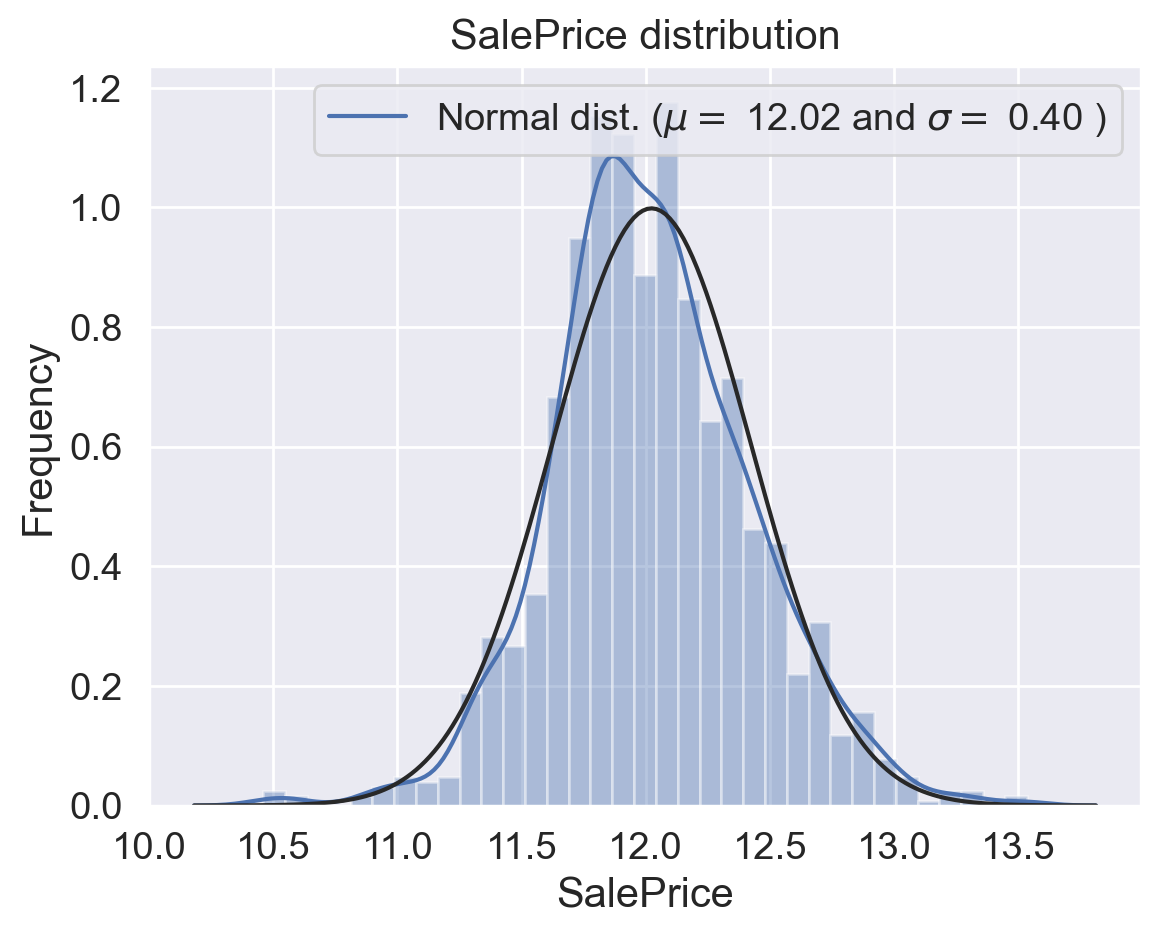

In [150]:
# Apply log(1+x) transformation to "SalePrice" to reduce skewness in the distribution.
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

# Plot the distribution of "SalePrice" after the log transformation, fitting it to a normal distribution.
sns.distplot(train_data['SalePrice'], fit=norm)

# Calculate the mean (mu) and standard deviation (sigma) for the log-transformed "SalePrice" distribution.
(mu, sigma) = norm.fit(train_data['SalePrice'])

# Add a legend to the plot that shows the calculated mean and standard deviation.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()


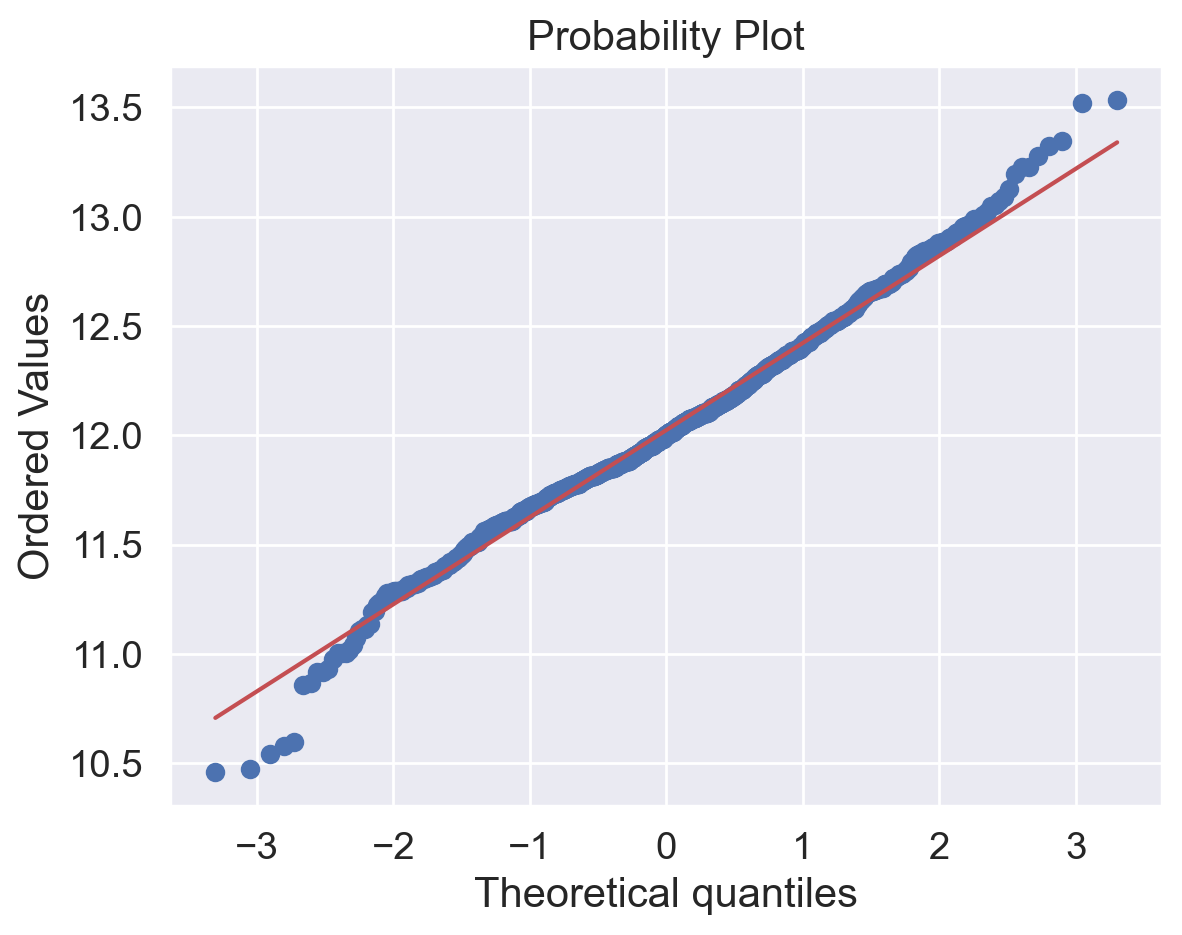

In [151]:
# Create a Q-Q plot to visually check how well the data fits the normal distribution.
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [152]:
# Extract the values of the "SalePrice" column to a NumPy array for future model training.
y_train_data = train_data.SalePrice.values

# Print the skewness of the "SalePrice" distribution after the transformation.
print("Skewness: %f" % train_data['SalePrice'].skew())

# Print the kurtosis (peakedness) of the "SalePrice" distribution after the transformation.
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 0.125807
Kurtosis: 0.812527


##### **Box-Cox Transformation**
- Some numerical features are heavily skewed, and we use Box-Cox transformation to reduce their skewness.